# Project Proposal: Optimizing Job Recommendations and Predicting Candidate Interest

###### CAPSTONE PROJECT
***PHASE 5:GROUP 2 MEMBERS:***
1.   Isaac Munyaka.
2.   Phemina Wambui.
3.   Otiende Ogada.
4.   Caroline Gesaka.
5.   Ann Njoroge.
6.   Joan Maina.

## Background Story

The employment sector is continuously evolving, with job seekers and employers facing numerous challenges. Job seekers often struggle to find suitable job opportunities that match their skills and preferences, while employers find it difficult to attract qualified candidates for their job postings. With the advent of advanced data analytics and machine learning, there is an opportunity to enhance the job matching process, making it more efficient and effective for both parties.

## Introduction
In today's competitive job market, the ability to efficiently match job seekers with relevant job opportunities is crucial. Leveraging data from job postings and job seeker profiles, machine learning models can significantly improve the job search experience and the quality of job applications received by employers. This proposal outlines a plan to develop two machine learning models: one for optimizing job recommendations for job seekers and another for predicting the likelihood of job postings receiving a high or low number of applications.

## Business Understanding
For job seekers, finding the right job that matches their skills, preferences, and career aspirations is a challenging task. Similarly, employers face difficulties in creating job postings that attract the right candidates. By addressing these challenges through advanced machine learning models, we can create a more efficient job market, benefiting both job seekers and employers.

## Problem Statement
Despite the vast amount of job postings available online, job seekers often find it challenging to identify the most relevant opportunities. Conversely, employers struggle to understand what factors contribute to the attractiveness of their job postings, leading to a mismatch between job offers and applications. This proposal aims to solve these issues by:
1.	Providing personalized job recommendations to job seekers to match them with the most suitable job postings.
2.	Developing a machine learning model that predicts whether a job posting will receive a high or low number of applications, helping employers improve their job postings.


## Objectives
1.***Optimize Job Recommendations***: Provide personalized job recommendations to job seekers to match them with the most suitable job postings.

2.***Predict Candidate Interest***: Develop a machine learning model to predict whether a job posting will receive a high or low number of applications, enabling companies to understand which factors attract candidates the most and improve their job postings.

## Target Audience
***Job Seekers***: Individuals seeking suitable job opportunities and career growth.

***Employers***: Companies looking to recruit qualified candidates for job openings.

***Recruitment Agencies***: Agencies that assist job seekers and employers in the recruitment process.

## SUCCESS METRICS

1.Application Rate: Measure the percentage of job postings that receive applications. An increase in this rate indicates that job postings are more appealing to job seekers.

2.Qualified Application Rate: Track the percentage of applications that meet the job requirements. A higher rate signifies that job postings are attracting more suitable candidates.

3.Time to Fill: Measure the average time taken to fill a job position from the posting date to the hiring date. A reduction in this time suggests improved efficiency in attracting and hiring candidates.

4.Click-Through Rate (CTR): Monitor the percentage of job seekers who click on job postings. An increase in CTR indicates that job postings are effectively capturing job seekers' interest.

5.Candidate Engagement: Track metrics such as the number of views, shares, and saves for job postings. Higher engagement levels reflect increased interest in the job postings.

## 1.Data Understanding

***Dataset***: LinkedIn Job Postings

***Source***: LinkedIn Job Postings (2023 - 2024) (kaggle.com)

***Columns***:

job_id: Unique identifier for each job posting, essential for tracking and referencing individual jobs.

company_name: Provides the name of the company offering the job, which helps in understanding the job context and employer branding.

title: The job title is critical for identifying the nature of the job and matching it with user preferences.

description: Contains detailed information about job responsibilities and requirements, which is crucial for matching the job with user skills and interests.

max_salary: Indicates the highest salary offered for the job, helping to match job seekers' salary expectations.

min_salary: Shows the lowest salary offered, providing a range for matching job seekers' financial requirements.

location: Geographic location of the job, which is important for matching based on job seekers' preferred or available locations.

views: Number of views the job posting has received, which can indicate the popularity or competitiveness of the job.

med_salary: Median salary for the job, providing a central measure of compensation, useful for understanding typical earnings.

applies: Number of applications received, which can reflect job demand and help gauge the job's attractiveness.

remote_allowed: Indicates if remote work is an option, which is increasingly relevant for job seekers preferring or needing remote work arrangements.

formatted_experience_level: Specifies the required experience level (e.g., entry-level, senior), aiding in matching jobs with job seekers' experience.

skills_desc: Describes the skills required for the job, crucial for aligning job seekers' skills with job requirements.

listed_time: Timestamp of when the job was posted, helping to understand the job’s recency and relevance.

posting_domain: Indicates the industry or sector of the job, useful for matching jobs with job seekers’ industry interests.

currency: Specifies the currency in which the salary is offered, important for job seekers in different regions or countries.

compensation_type: Details the type of compensation (e.g., base salary, bonuses), helping job seekers understand the total compensation package.


### Load the DataSet

In [1]:
import pandas as pd
import numpy as np


file_path = r'C:\Users\Caro\Downloads\postings.csv'

try:
    data = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='warn')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1', on_bad_lines='warn')

data.head()


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,1.715450e+12,NaN,NaN,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,1.716044e+12,NaN,NaN,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY


In [2]:
data.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,1.716163e+12,NaN,Mid-Senior level,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,1.716164e+12,NaN,Mid-Senior level,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,1.716164e+12,NaN,Mid-Senior level,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,1.716165e+12,NaN,NaN,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN
123848,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,1.716165e+12,NaN,Mid-Senior level,NaN,1.713573e+12,NaN,0,FULL_TIME,USD,BASE_SALARY


In [3]:
data.description

0         Job descriptionA leading real estate firm in N...
1         At Aspen Therapy and Wellness , we are committ...
2         The National Exemplar is accepting application...
3         Senior Associate Attorney - Elder Law / Trusts...
4         Looking for HVAC service tech with experience ...
                                ...                        
123844    Our Walnut Creek office is currently seeking a...
123845    About Pinterest:\n\nMillions of people across ...
123846    Company Overview\n\nEPS Learning is a leading ...
123847    The Business Development Manager is a 'hunter'...
123848    Marketing Social Media Specialist - $70k – $75...
Name: description, Length: 123849, dtype: object

In [4]:
data.shape

(123849, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

### Unique Values

In [6]:
# For loop to generate and print unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")  # Add a newline for better readability between columns

Unique values in column 'job_id':
[    921716    1829192   10998357 ... 3906267131 3906267195 3906267224]


Unique values in column 'company_name':
['Corcoran Sawyer Smith' nan 'The National Exemplar ' ... 'The Dyrt'
 'EPS Learning' 'Trelleborg Applied Technologies']


Unique values in column 'title':
['Marketing Coordinator' 'Mental Health Therapist/Counselor'
 'Assitant Restaurant Manager' ...
 'Staff Software Engineer, ML Serving Platform'
 'Account Executive, Oregon/Washington'
 'Marketing Social Media Specialist']


Unique values in column 'description':
['Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinar

### Duplicates

In [7]:
# Check for duplicates based on all columns
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


### PlaceHolders

In [8]:
#Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "NaN", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void"]
# Loop through each column and check for potential placeholders
found_placeholder = False
for column in data.columns:
    unique_values = data[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (data[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True
if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

Column 'company_name': Found 0 occurrences of potential placeholder 'nan'
Column 'description': Found 0 occurrences of potential placeholder 'nan'
Column 'max_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'pay_period': Found 0 occurrences of potential placeholder 'nan'
Column 'company_id': Found 0 occurrences of potential placeholder 'nan'
Column 'views': Found 0 occurrences of potential placeholder 'nan'
Column 'med_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'min_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'applies': Found 0 occurrences of potential placeholder 'nan'
Column 'remote_allowed': Found 0 occurrences of potential placeholder 'nan'
Column 'application_url': Found 0 occurrences of potential placeholder 'nan'
Column 'closed_time': Found 0 occurrences of potential placeholder 'nan'
Column 'formatted_experience_level': Found 0 occurrences of potential placeholder 'nan'
Column 'skills_desc': Found 0 occurrences o

### Missing Values

In [9]:
#check missing values
data.isnull().sum()

job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
currency                       87776
c

In [10]:
# Check for columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Display rows with missing values
rows_with_missing_values = data[data[missing_columns].isnull().any(axis=1)]

print("Columns with missing values:")
print(missing_columns)

print("\nRows with missing values:")
print(rows_with_missing_values)


Columns with missing values:
Index(['company_name', 'description', 'max_salary', 'pay_period', 'company_id',
       'views', 'med_salary', 'min_salary', 'applies', 'remote_allowed',
       'application_url', 'closed_time', 'formatted_experience_level',
       'skills_desc', 'posting_domain', 'currency', 'compensation_type'],
      dtype='object')

Rows with missing values:
            job_id                     company_name  \
0           921716            Corcoran Sawyer Smith   
1          1829192                              NaN   
2         10998357           The National Exemplar    
3         23221523           Abrams Fensterman, LLP   
4         35982263                              NaN   
...            ...                              ...   
123844  3906267117                     Lozano Smith   
123845  3906267126                        Pinterest   
123846  3906267131                     EPS Learning   
123847  3906267195  Trelleborg Applied Technologies   
123848  3906267224 

In [11]:
#calcute the  percentage of missing values
missing_percentage= data.isnull().sum()*100 /len(data)

# Arrange the columns in descending order based on the percentage of missing values
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

print(missing_percentage_sorted)


closed_time                   99.133622
skills_desc                   98.030666
med_salary                    94.929309
remote_allowed                87.689848
applies                       81.170619
max_salary                    75.944093
min_salary                    75.944093
currency                      70.873402
compensation_type             70.873402
pay_period                    70.873402
posting_domain                32.271556
application_url               29.604599
formatted_experience_level    23.745852
company_name                   1.387981
company_id                     1.386366
views                          1.363757
description                    0.005652
title                          0.000000
work_type                      0.000000
sponsored                      0.000000
listed_time                    0.000000
expiry                         0.000000
application_type               0.000000
job_posting_url                0.000000
original_listed_time           0.000000


### Column Types

In [12]:
# column names
data.columns


Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type'],
      dtype='object')

In [13]:
# Identify numerical columns (int, float, datetime types)
numerical_columns = data.select_dtypes(include=['number', 'datetime']).columns.tolist()

print("Numerical Columns:", numerical_columns)


Numerical Columns: ['job_id', 'max_salary', 'company_id', 'views', 'med_salary', 'min_salary', 'applies', 'original_listed_time', 'remote_allowed', 'expiry', 'closed_time', 'listed_time', 'sponsored']


In [14]:
# Identify categorical columns
categorical_columns = [col for col in data.select_dtypes(include=['object']).columns if col in [
    'pay_period', 'formatted_work_type', 'application_type', 'location','company_name','formatted_experience_level', 
    'work_type', 'currency', 'compensation_type']]

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['company_name', 'pay_period', 'location', 'formatted_work_type', 'application_type', 'formatted_experience_level', 'work_type', 'currency', 'compensation_type']


In [15]:
# Identify string columns
string_columns = [col for col in data.select_dtypes(include=['object']).columns if col not in categorical_columns]

print("String Columns:", string_columns)

String Columns: ['title', 'description', 'job_posting_url', 'application_url', 'skills_desc', 'posting_domain']


## 2.Data Cleaning

### Handling Missing Values

#### Columns to Drop

In [16]:
# Drop the specified columns with reasons
columns_to_drop = [
    'med_salary',      
    'company_id',      
    'closed_time',      
    'application_url',    
    'job_posting_url',    
    'posting_domain',     
    'original_listed_time',
    'sponsored', 
    'formatted_work_type', 
    'compensation_type',
    'skills_desc',
    'remote_allowed',
    'application_type',
    
    
    
]


data =data.drop(columns=columns_to_drop)

#Drop the specified columns with reasons
'med_salary',         # 94.93% missing; does not provide additional insights from max/min salary
'company_id',         # Redundant if company_name is sufficient
'closed_time',        # 99.13% missing; not critical to the core objectives
'application_url',    # Not integrating a direct application feature 
'job_posting_url',    # Not integrating a direct application feature
'posting_domain',     #not essential for our recommender logic
'original_listed_time',# since we have listed time ,its redundant
'sponsored',           #not essential for our recommender logic
'formatted_work_type', #reduntant since we have formatted work type
'compensation_type'   #reduntant since we have pay period column,pay period column provides more sufficient info than this



#columns with reasons to keep
description: Provides job details, essential for matching job seekers with jobs.
title: Job title, crucial for relevance.
work_type: Specifies full-time, part-time, etc.
listed_time: Important for tracking job posting timelines.
location: Job location, crucial for geographical matching.
job_id: Unique identifier for each job posting.
company_name, company_id: Information about the company.
max_salary,min_salary: Information on job salary range.
'views'
'expiry',              #not essential for our recommender logic
'pay_period

In [17]:
data.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies', 'expiry',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency'],
      dtype='object')

#### 1.Numerical columns

In [18]:
# Filled with mean values to maintain the average trends
# Impute numerical columns with median to maintain the skewed distributions
for column in data.select_dtypes(include=['float64', 'int64']):
    if column in missing_columns:
        data[column].fillna(data[column].median(), inplace=True)

        
# Ensure 'job_id' is a string and strip any whitespace
data['job_id'] = data['job_id'].astype(str).str.strip()
       


#### 2.Categorical columns

In [19]:
#Filled with the mode to maintain the most common category
categorical_columns = ['currency']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

#### 3.Text columns

In [20]:
# Define the clean_text function
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Strip whitespace from the beginning and end
        text = text.strip()
        # Replace newline characters with spaces
        text = text.replace('\n', ' ').replace('\r', '')
        # Remove extra spaces
        text = ' '.join(text.split())
    return text

# Fill missing formatted_experience_level with 'Not specified' and clean text
data['formatted_experience_level'].fillna('Not specified', inplace=True)
data['formatted_experience_level'] = data['formatted_experience_level'].apply(clean_text)

# Fill missing work_type with 'Not specified' and clean text
data['work_type'].fillna('Not specified', inplace=True)
data['work_type'] = data['work_type'].apply(clean_text)

# Fill missing values with a placeholder
data['pay_period'].fillna('Not Provided', inplace=True)
data['pay_period'] = data['pay_period'].apply(clean_text)


# Fill missing titles with 'Unknown' and clean text
data['title'].fillna('Unknown', inplace=True)
data['title'] = data['title'].apply(clean_text)

# Fill missing company names with 'Unknown' and clean text
data['company_name'].fillna('Unknown', inplace=True)
data['company_name'] = data['company_name'].apply(clean_text)

# Fill missing locations with 'Unknown' and clean text
data['location'].fillna('Unknown', inplace=True)
data['location'] = data['location'].apply(clean_text)


# Fill missing descriptions with 'Not provided' and clean text
data['description'].fillna('Not provided', inplace=True)
data['description'] = data['description'].apply(clean_text)


# Add 'description_length' column
data['description_length'] = data['description'].apply(len)


#### 3.DateTime columns

In [21]:
# Convert 'listed_time' and 'expiry' to datetime
data['listed_time'] = pd.to_datetime(data['listed_time'], errors='coerce')
data['expiry'] = pd.to_datetime(data['expiry'], errors='coerce')

# Get the current date and time
current_datetime = pd.Timestamp.now()

# Define the range for updating 'listed_time'
days_range = 30

# Generate random dates within the defined range
def generate_random_dates(n, days_range, base_date):
    start_date = base_date - pd.DateOffset(days=days_range)
    end_date = base_date + pd.DateOffset(days=days_range)
    return pd.to_datetime(np.random.uniform(start_date.value, end_date.value, size=n), unit='ns')

# Update 'listed_time' with random dates within the range of the current date
data['listed_time'] = generate_random_dates(len(data), days_range, current_datetime)

# Define the expiration threshold in days
expiry_threshold = 50

# Calculate the actual expiry date based on the updated 'listed_time' and threshold
data['calculated_expiry_date'] = data['listed_time'] + pd.DateOffset(days=expiry_threshold)

# Determine if the job is expired by comparing the 'expiry' date with 'calculated_expiry_date'
data['is_expired'] = data['expiry'] < data['calculated_expiry_date']

# Drop the 'calculated_expiry_date' column if it's no longer needed
data.drop(columns=['expiry'], inplace=True)



In [22]:
#check missing values after cleaning
data.isnull().sum()

job_id                        0
company_name                  0
title                         0
description                   0
max_salary                    0
pay_period                    0
location                      0
views                         0
min_salary                    0
applies                       0
formatted_experience_level    0
listed_time                   0
work_type                     0
currency                      0
description_length            0
calculated_expiry_date        0
is_expired                    0
dtype: int64

In [23]:
#check original dataframe columns
data.columns

#Assingn cleaned dataframe 
df = data

#copy original dataframe original DataFrame
df = df_copy = df.copy()

# Save the copied DataFrame to a CSV file
df_copy.to_csv('copied_postings.csv', index=False)

In [24]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency',
       'description_length', 'calculated_expiry_date', 'is_expired'],
      dtype='object')

In [25]:
df.shape

(123849, 17)

## Statistical Analysis

### 1.Descriptive Analysis

In [26]:
# Set the display option to show floats as integers
pd.options.display.float_format = '{:,.0f}'.format

# Summary Statistics for Numeric Columns
summary_stats = df.describe()
summary_stats

,max_salary,views,min_salary,applies,listed_time,description_length,calculated_expiry_date
count,"123,849","123,849","123,849","123,849",123849,"123,849",123849
mean,"82,872",14,"61,181",4,2024-08-06 04:59:44.170270464,"3,750",2024-09-25 04:59:44.170270720
min,1,1,1,1,2024-07-07 05:20:00.179791872,2,2024-08-26 05:20:00.179791872
25%,"80,000",3,"60,000",3,2024-07-22 02:38:59.653689600,"2,166",2024-09-10 02:38:59.653689600
50%,"80,000",4,"60,000",3,2024-08-06 04:44:31.756811520,"3,419",2024-09-25 04:44:31.756811520
75%,"80,000",7,"60,000",3,2024-08-21 06:08:45.999032064,"4,965",2024-10-10 06:08:45.999032064
max,"120,000,000","9,975","85,000,000",967,2024-09-05 05:18:18.937642752,"23,106",2024-10-25 05:18:18.937642752
std,"343,906",85,"243,265",13,NaN,"2,137",NaN


In [27]:
# Frequency Distribution for Categorical Columns
company_name_dist = df['company_name'].value_counts()
company_name_dist

company_name
unknown                                           1719
liberty healthcare and rehabilitation services    1108
the job network                                   1003
j. galt                                            604
teksystems                                         529
                                                  ... 
proterra inc                                         1
ava labs                                             1
ks engineers, p.c.                                   1
cascade manor (oregon)                               1
trelleborg applied technologies                      1
Name: count, Length: 24414, dtype: int64

In [28]:
location_dist = df['location'].value_counts()
location_dist

location
united states          8125
new york, ny           2756
chicago, il            1834
houston, tx            1762
dallas, tx             1383
                       ... 
medway, oh                1
sulphur springs, il       1
derry village, nh         1
ocean grove, nj           1
carroll county, md        1
Name: count, Length: 8526, dtype: int64

In [29]:
# Frequency Distribution for Categorical Columns
title_dist = df['title'].value_counts()
title_dist

title
sales manager                                     673
customer service representative                   482
project manager                                   360
assistant store manager                           320
administrative assistant                          261
                                                 ... 
tool preparer iii - 3rd shift                       1
1st shift catalog controls team leader              1
tool & die maker i - 2nd shift                      1
breast surgery - nurse practitioner - abington      1
marketing social media specialist                   1
Name: count, Length: 71536, dtype: int64

In [30]:
# Frequency Distribution for Categorical Columns
formatted_experience_level_dist = df['formatted_experience_level'].value_counts()
formatted_experience_level_dist

formatted_experience_level
mid-senior level    41489
entry level         36708
not specified       29409
associate            9826
director             3746
internship           1449
executive            1222
Name: count, dtype: int64

In [31]:
# Frequency Distribution for Categorical Columns
work_type_dist = df['work_type'].value_counts()
work_type_dist

work_type
full_time     98814
contract      12117
part_time      9696
temporary      1190
internship      983
volunteer       562
other           487
Name: count, dtype: int64

## 3.Exploratory Data Analysis

### 3.1.Univariet Analysis

##### 1.Job Title Distribution

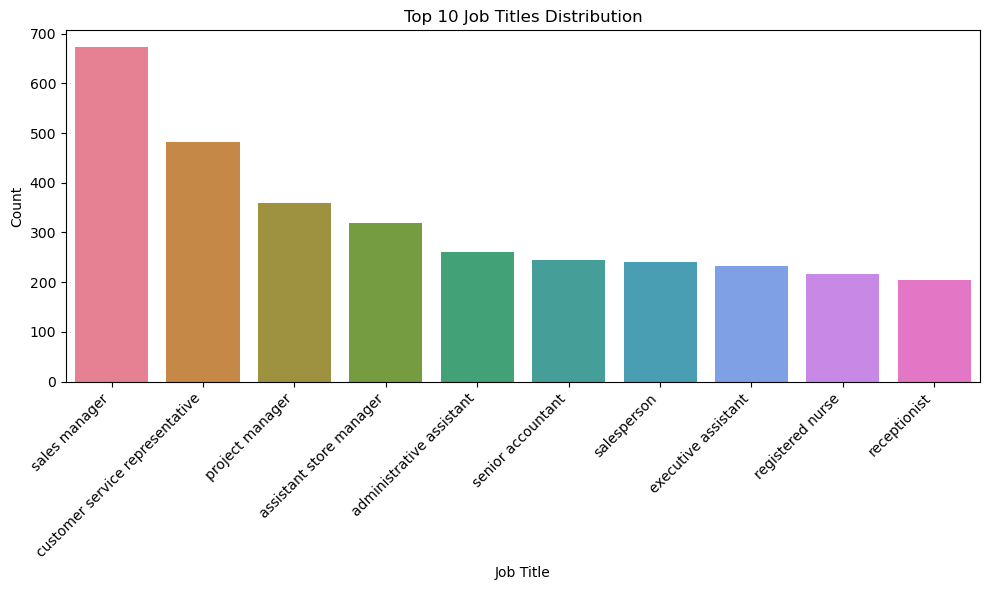

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the color palette
custom_palette = sns.color_palette("husl", 10)  # Example of a custom palette with 10 colors

plt.figure(figsize=(10, 6))
sns.countplot(x='title', data=df, order=df['title'].value_counts().index[:10], palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Titles Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### 2.Company Distribution

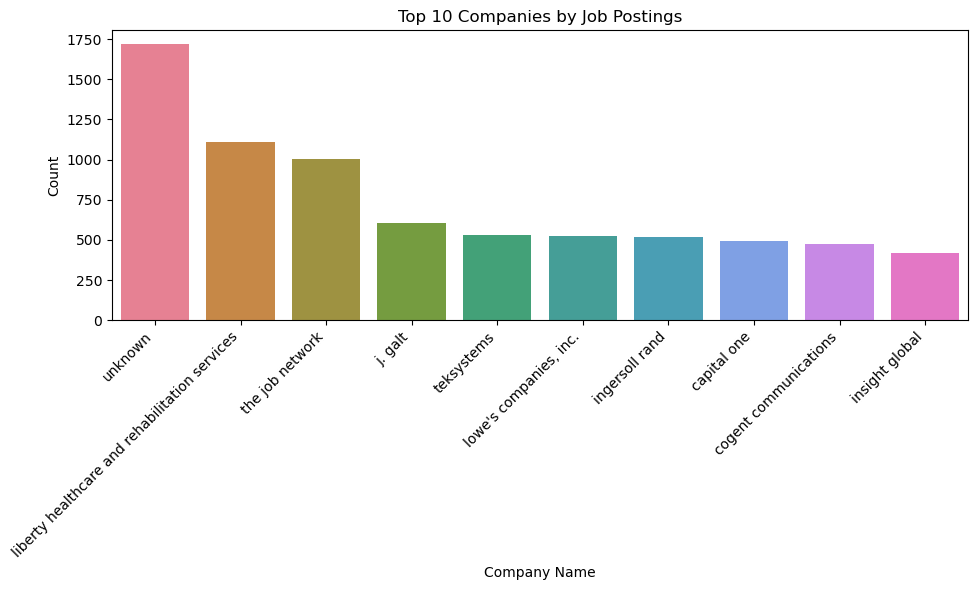

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='company_name', data=df, order=df['company_name'].value_counts().index[:10],palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 3.Salary Distribution

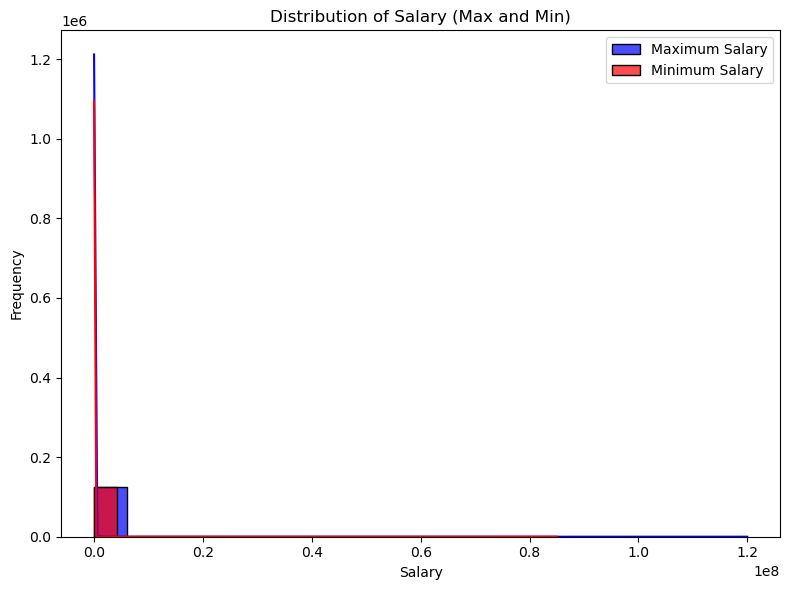

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df['max_salary'], bins=20, kde=True, label='Maximum Salary', color='blue', alpha=0.7)
sns.histplot(df['min_salary'], bins=20, kde=True, label='Minimum Salary', color='red', alpha=0.7)
plt.title('Distribution of Salary (Max and Min)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

##### 4.Location Distribution

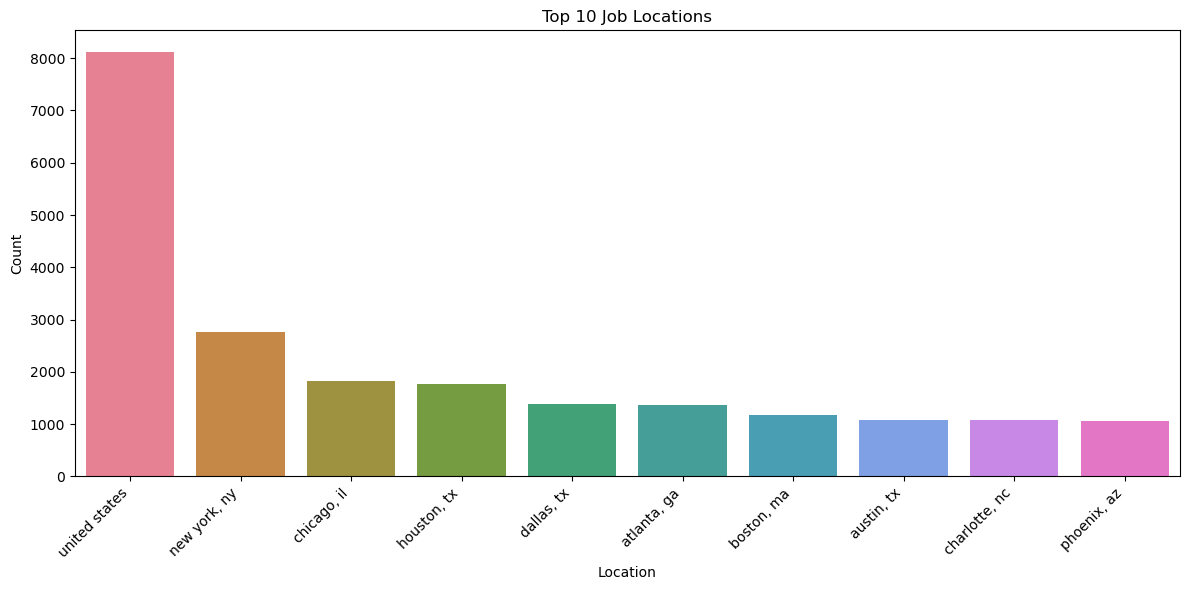

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='location', data=df, order=df['location'].value_counts().index[:10],palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 5.Work_Type Distribution

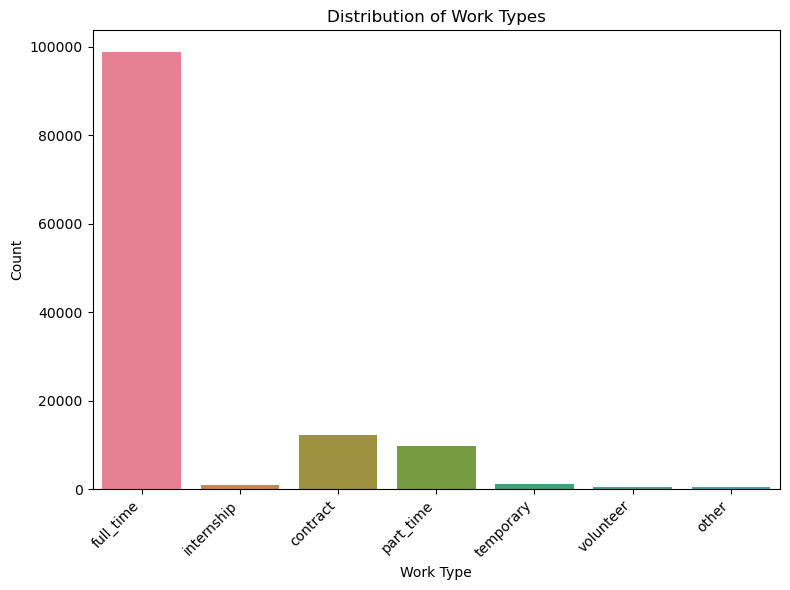

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='work_type', data=df,palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Work Types')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 6.Experience Level Distribution

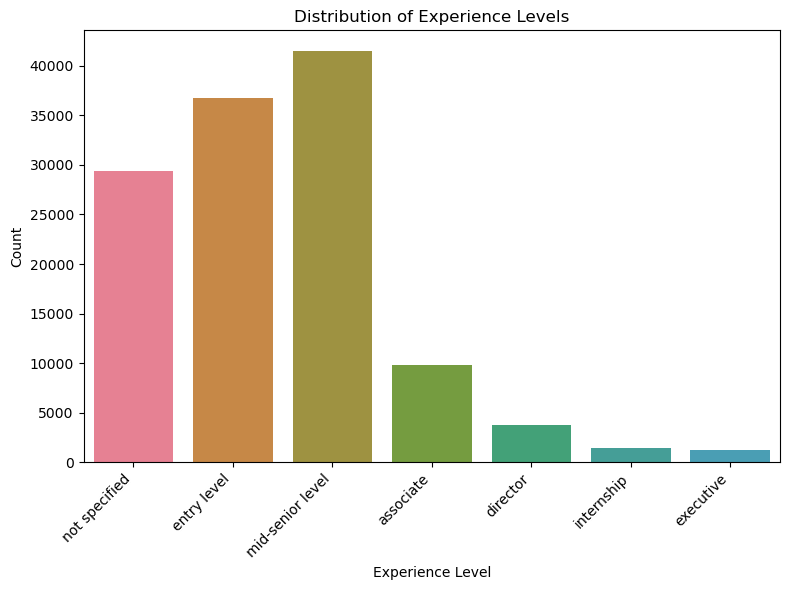

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='formatted_experience_level', data=df,palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 7.Currency Distribution

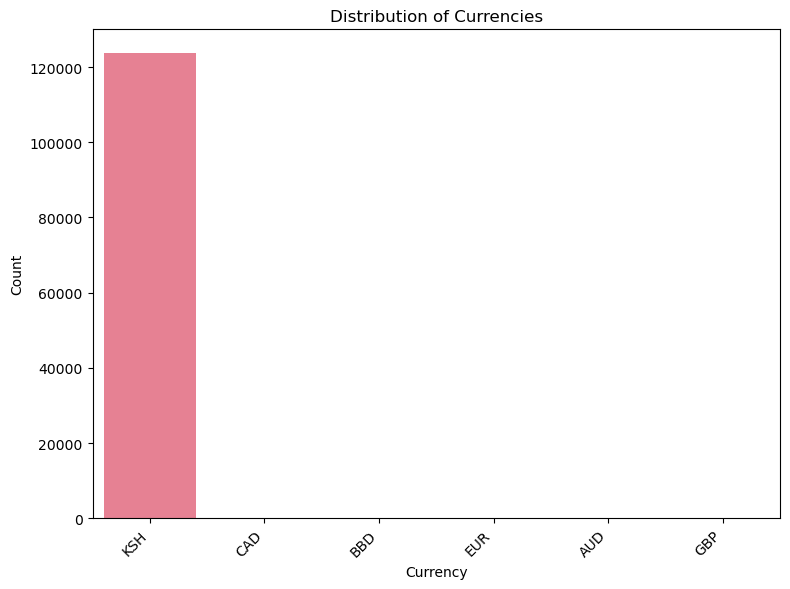

In [38]:
# Replace 'USD' with 'KSH' in the 'currency' column
df['currency'] = df['currency'].replace('USD', 'KSH')

plt.figure(figsize=(8, 6))
sns.countplot(x='currency', data=df,palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Currencies')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 1.Top 20 Job Titles with Most Applications

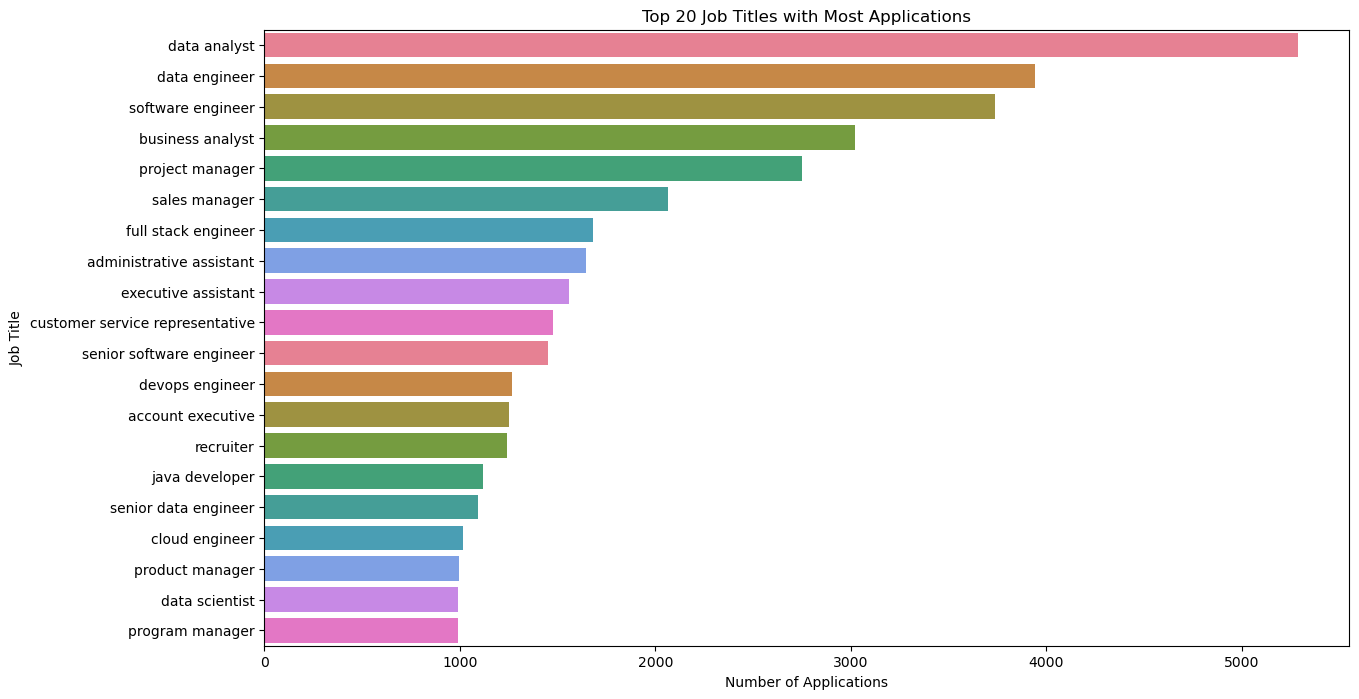

In [39]:
# Group by 'title' and sum the 'applies' column
title_applications = df.groupby('title')['applies'].sum().reset_index()

# Sort the results in descending order of applications
title_applications_sorted = title_applications.sort_values(by='applies', ascending=False)

# Select the top 10 job titles with the most applications
top_titles = title_applications_sorted.head(20)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_titles, x='applies', y='title', palette=custom_palette)
plt.title('Top 20 Job Titles with Most Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Job Title')
plt.show()


##### 2.Pay Period vs Max_salary

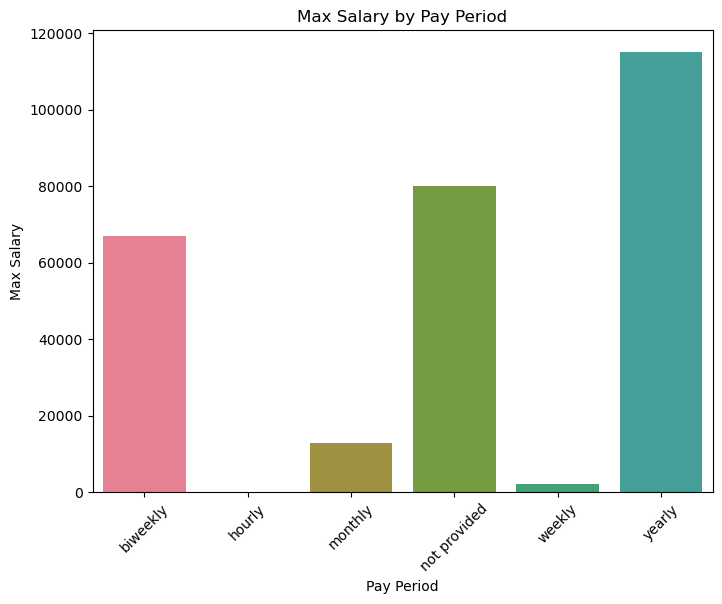

In [40]:
# Aggregate the data to get the median salary for each pay period
median_salary_by_pay_period = df.groupby('pay_period')['max_salary'].median().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=median_salary_by_pay_period, x='pay_period', y='max_salary', palette=custom_palette)
plt.title('Max Salary by Pay Period')
plt.xlabel('Pay Period')
plt.ylabel('Max Salary')
plt.xticks(rotation=45)
plt.show()


##### 3.Top 20 Job Titles with Most Views

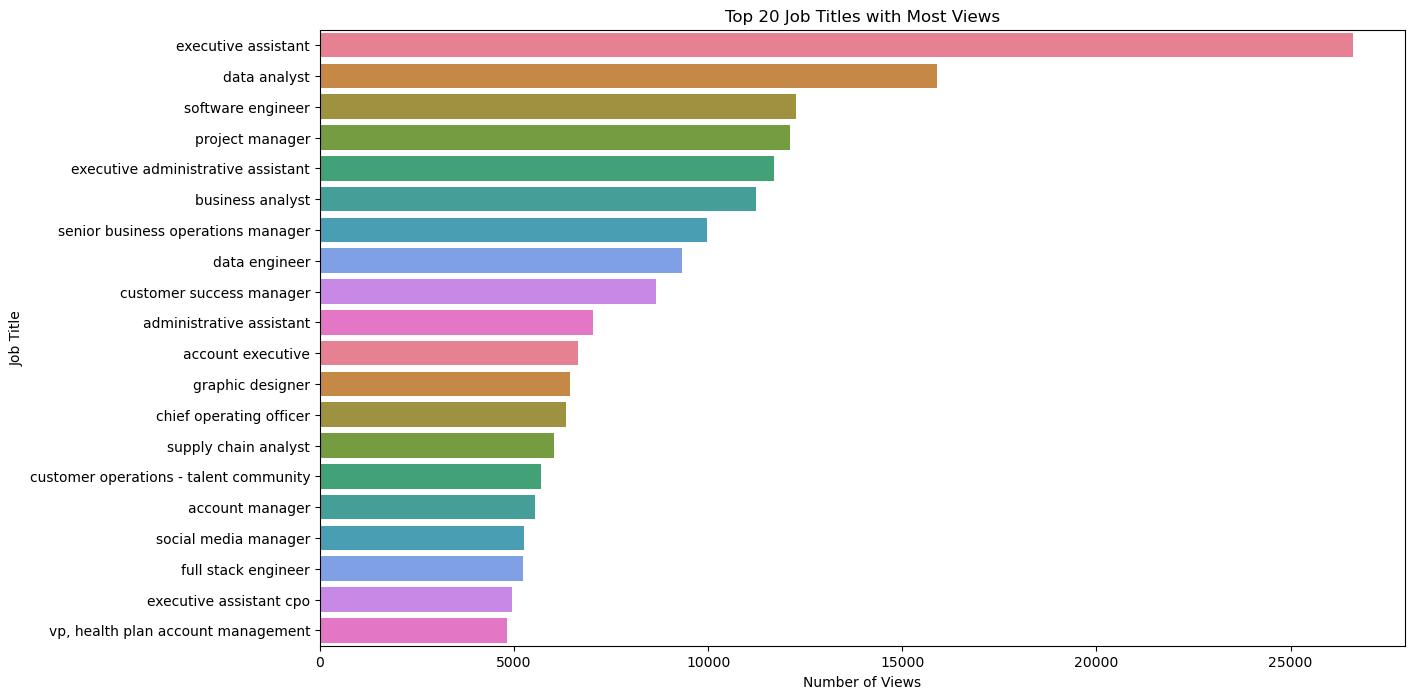

In [41]:
# Group by 'title' and sum the 'views' column
title_views = df.groupby('title')['views'].sum().reset_index()

# Sort the results in descending order of views
title_views_sorted = title_views.sort_values(by='views', ascending=False)

# Select the top 10 job titles with the most views
top_titles_views = title_views_sorted.head(20)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_titles_views, x='views', y='title',palette=custom_palette)
plt.title('Top 20 Job Titles with Most Views')
plt.xlabel('Number of Views')
plt.ylabel('Job Title')
plt.show()

##### 4.Bottom 20 Job Titles with Least Views

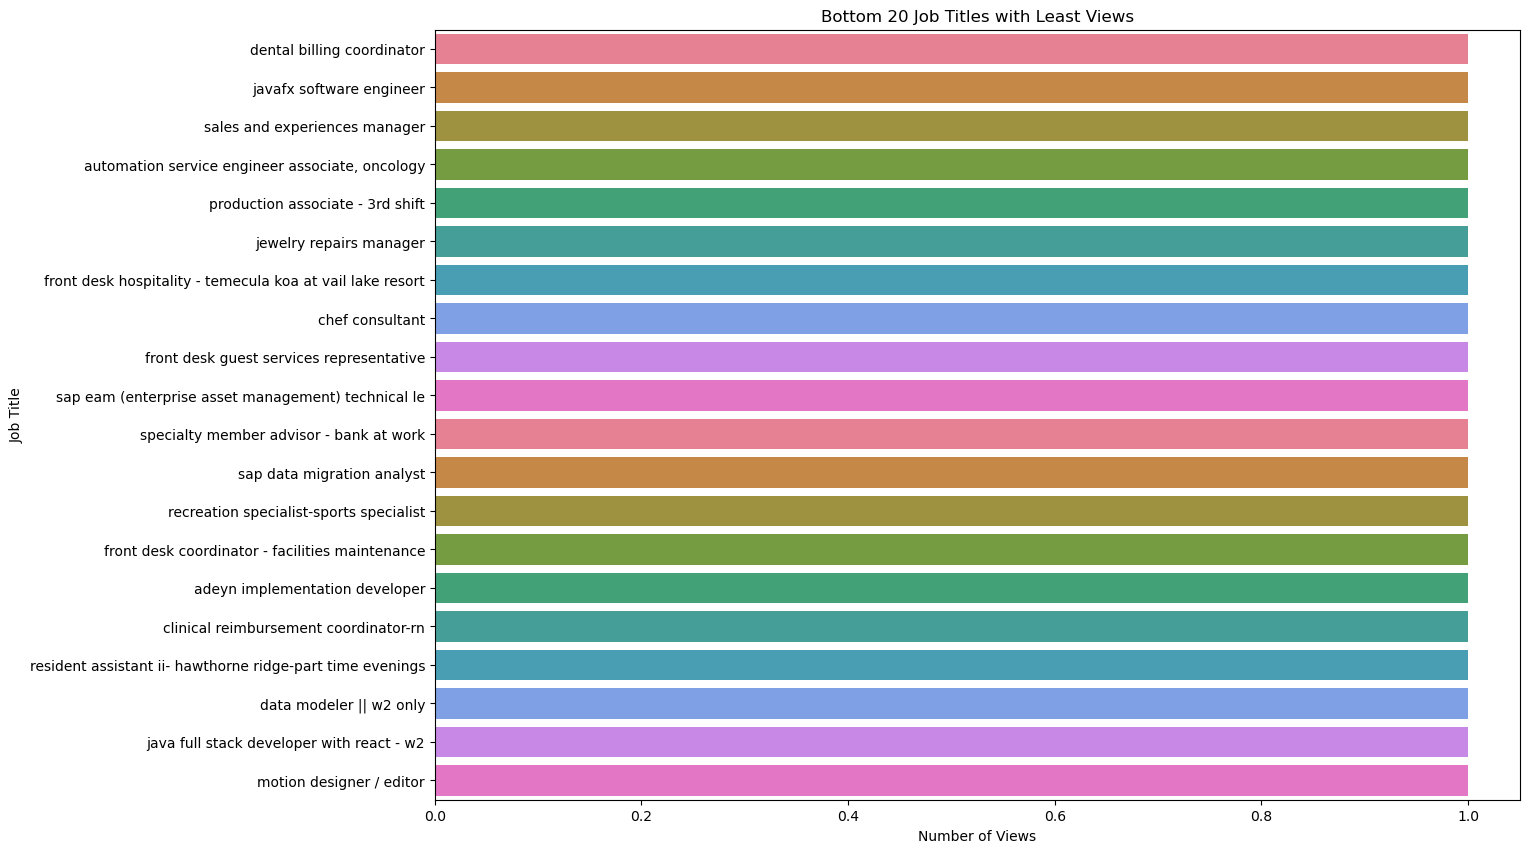

In [42]:
# Group by 'title' and sum the 'views' column
title_views = df.groupby('title')['views'].sum().reset_index()

# Sort the results in ascending order of views
title_views_sorted = title_views.sort_values(by='views', ascending=True)

# Select the bottom 20 job titles with the least views
bottom_titles_views = title_views_sorted.head(20)

# Plot the results
plt.figure(figsize=(14, 10))
sns.barplot(data=bottom_titles_views, x='views', y='title',palette=custom_palette)
plt.title('Bottom 20 Job Titles with Least Views')
plt.xlabel('Number of Views')
plt.ylabel('Job Title')
plt.show()


##### 5.Average Minimum and Maximum Salaries by Experience Level

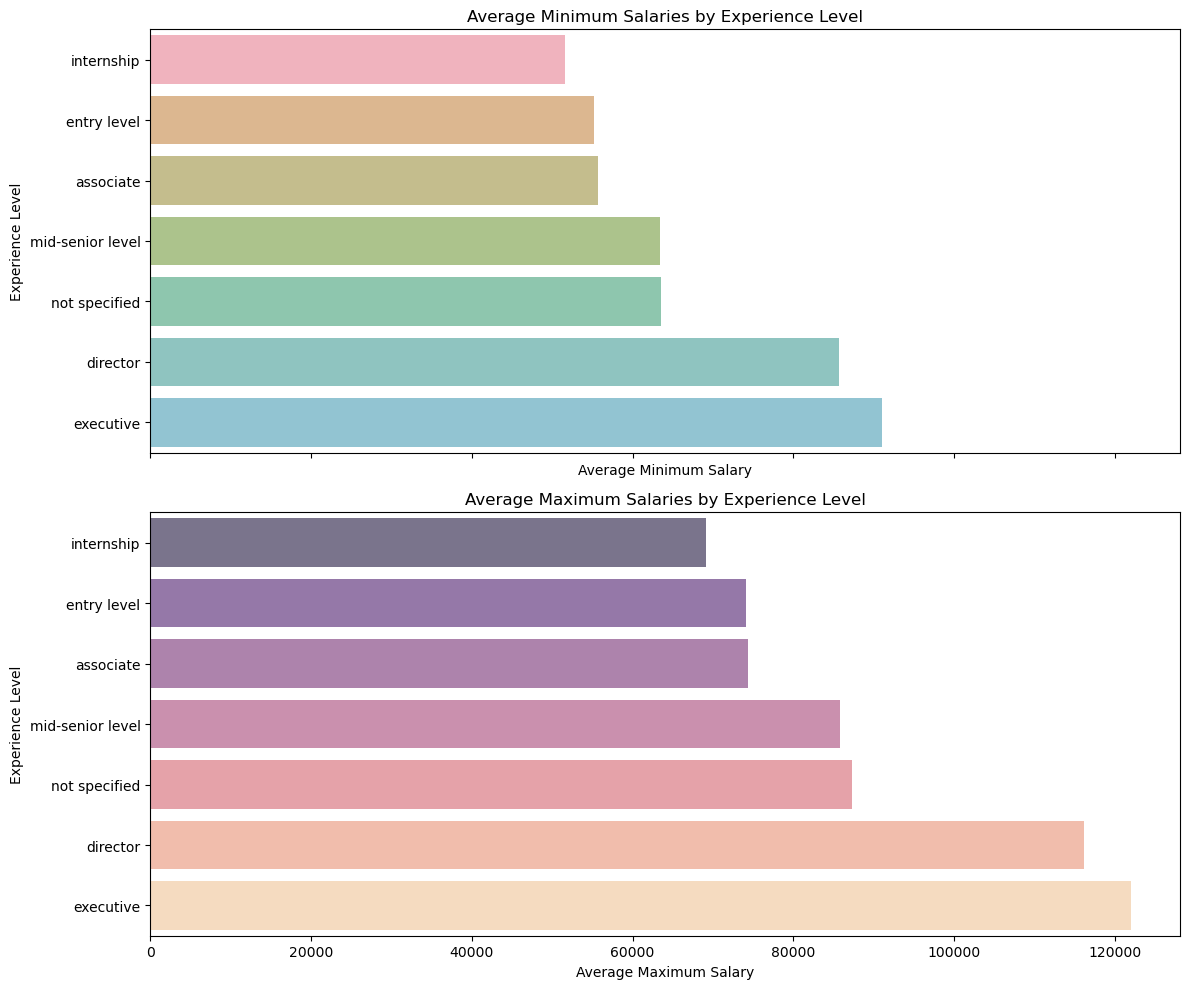

In [43]:

# Calculate average minimum and maximum salaries by experience level
average_salaries = df.groupby('formatted_experience_level')[['min_salary', 'max_salary']].mean().sort_values(by='min_salary')

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Create a bar plot for minimum salaries
sns.barplot(x=average_salaries['min_salary'], y=average_salaries.index,palette=custom_palette, ax=axs[0], alpha=0.6)
axs[0].set_title('Average Minimum Salaries by Experience Level')
axs[0].set_xlabel('Average Minimum Salary')
axs[0].set_ylabel('Experience Level')

# Create a bar plot for maximum salaries
sns.barplot(x=average_salaries['max_salary'], y=average_salaries.index, palette='magma', ax=axs[1], alpha=0.6)
axs[1].set_title('Average Maximum Salaries by Experience Level')
axs[1].set_xlabel('Average Maximum Salary')
axs[1].set_ylabel('Experience Level')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

##### 6. Max Salary vs Min Salary by Experience level in Top Ten Companies

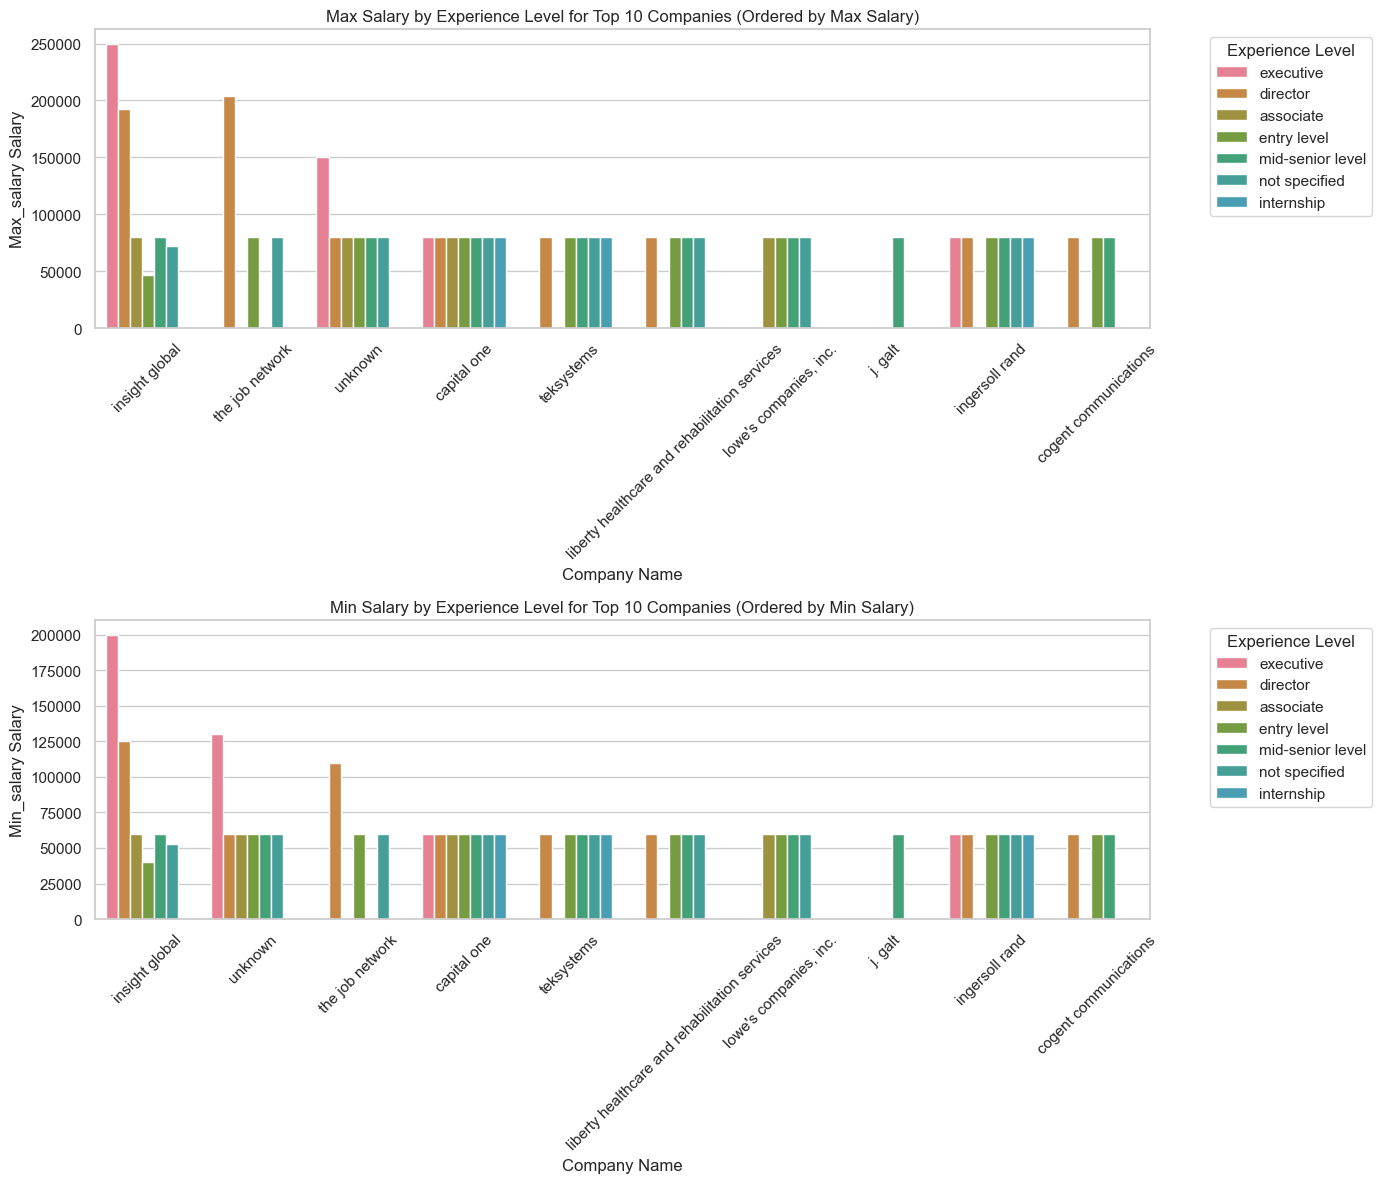

In [44]:
# Identify the top 10 companies by the number of job postings
top_companies = df['company_name'].value_counts().head(10).index

# Filter the DataFrame to include only these top companies
top_companies_df = df[df['company_name'].isin(top_companies)].copy()

# Ensure salaries are numeric
salary_columns = ['max_salary', 'min_salary']
top_companies_df.loc[:, salary_columns] = top_companies_df.loc[:, salary_columns].apply(pd.to_numeric, errors='coerce')

# Group by company and experience level, then calculate the median salary
grouped_df = top_companies_df.groupby(['company_name', 'formatted_experience_level'])[salary_columns].median().reset_index()

# Sort the DataFrame by max_salary in descending order
grouped_df_max = grouped_df.sort_values(by='max_salary', ascending=False)
# Sort the DataFrame by min_salary in descending order
grouped_df_min = grouped_df.sort_values(by='min_salary', ascending=False)

# Set the visual style of the plots
sns.set(style="whitegrid")

# Plot the results
plt.figure(figsize=(14, 12))

# Function to plot barplots
def plot_salary(df, salary_type, title, position):
    plt.subplot(2, 1, position)
    sns.barplot(data=df, x='company_name', y=salary_type, hue='formatted_experience_level',palette=custom_palette)
    plt.title(title)
    plt.xlabel('Company Name')
    plt.ylabel(salary_type.capitalize() + ' Salary')
    plt.xticks(rotation=45)
    plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot max_salary
plot_salary(grouped_df_max, 'max_salary', 'Max Salary by Experience Level for Top 10 Companies (Ordered by Max Salary)', 1)

# Plot min_salary
plot_salary(grouped_df_min, 'min_salary', 'Min Salary by Experience Level for Top 10 Companies (Ordered by Min Salary)', 2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##### 7.Location vs Jop posting Metrics

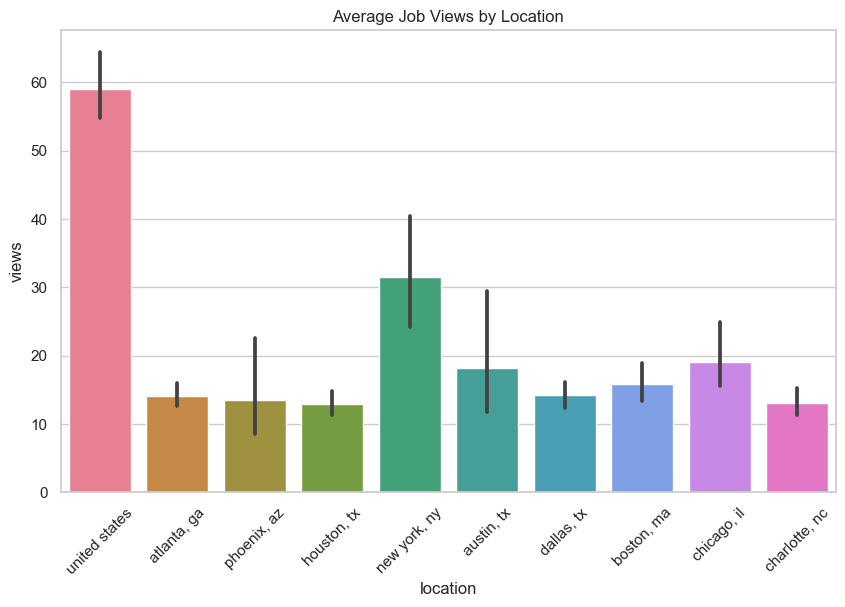

In [45]:
plt.figure(figsize=(10, 6))
top_locations = df['location'].value_counts().head(10).index
top_locations_df = df[df['location'].isin(top_locations)]

sns.barplot(data=top_locations_df, x='location', y='views', estimator=np.mean,palette=custom_palette)
plt.title('Average Job Views by Location')
plt.xticks(rotation=45)
plt.show()

##### 8.Average Max Salary by Work Type

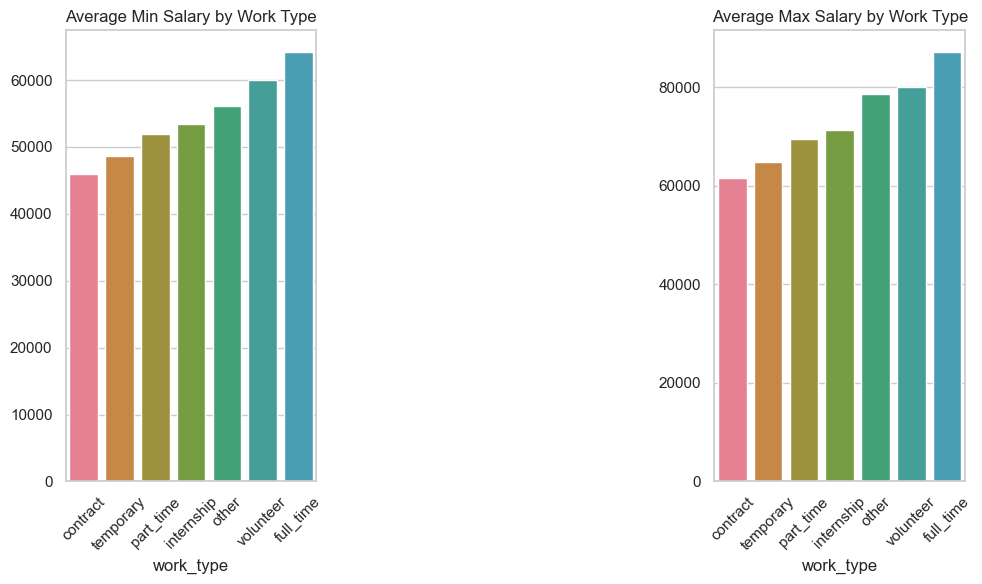

In [46]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
summary = df.groupby('work_type')['min_salary'].mean().sort_values()
sns.barplot(x=summary.index, y=summary.values,palette=custom_palette)
plt.title('Average Min Salary by Work Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
summary = df.groupby('work_type')['max_salary'].mean().sort_values()
sns.barplot(x=summary.index, y=summary.values,palette=custom_palette)
plt.title('Average Max Salary by Work Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### 9.Views vs. Applies

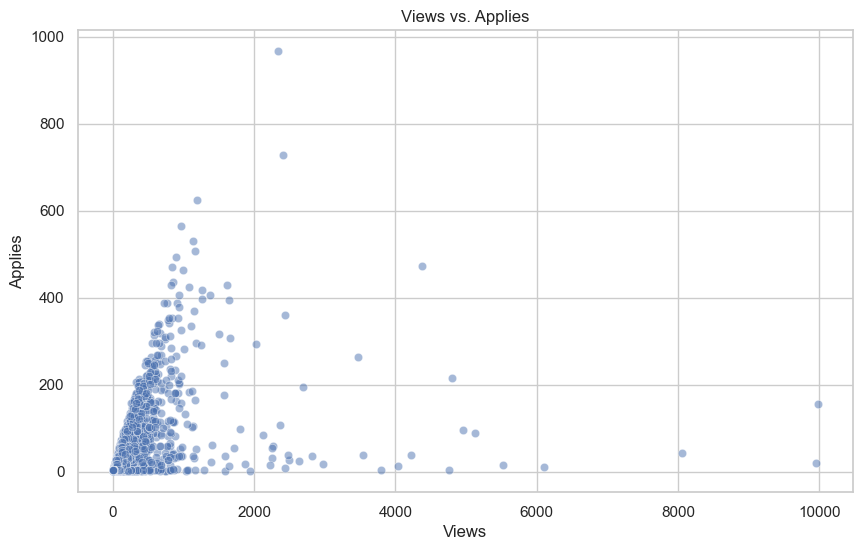

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='views', y='applies', alpha=0.5)
plt.title('Views vs. Applies')
plt.xlabel('Views')
plt.ylabel('Applies')
plt.show()

##### 10.Word Cloud of Job Titles

In [48]:
from wordcloud import WordCloud, STOPWORDS
#  additional stopwords for the three wordclouds below:

additional_stopwords = {"part", "time", "specialist", "HR","Hybrid", "Senior","Sr","Bonus", "Contract", "Entry",
                        "Day","perfom", "made","must", "experience","use","knowledge", "apply", "role", 
                        "employee", "change","application", "following","position", "requires","ability","skills",
                        "Level", "full" ,"NY" ,"rn" ,"2nd","Remote","Lead","II","United","States","shift"}  

stopwords = set(STOPWORDS).union(additional_stopwords)



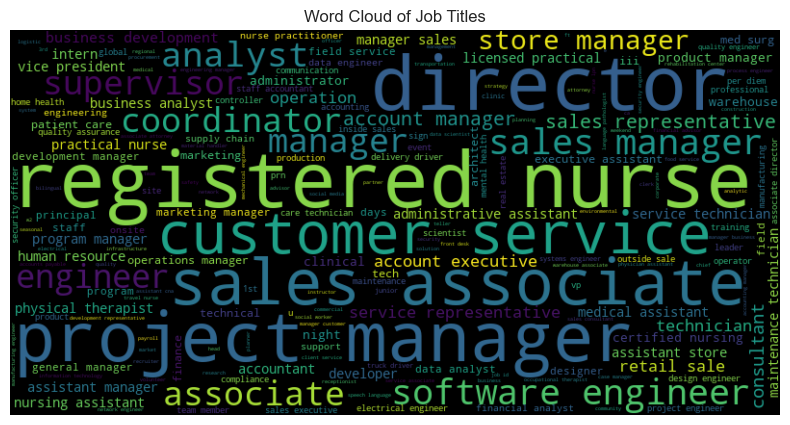

In [49]:
wordcloud = WordCloud(stopwords=stopwords,width=800, height=400, background_color='black').generate(' '.join(df["title"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles')
plt.show()

##### 11.Word Cloud of Job location

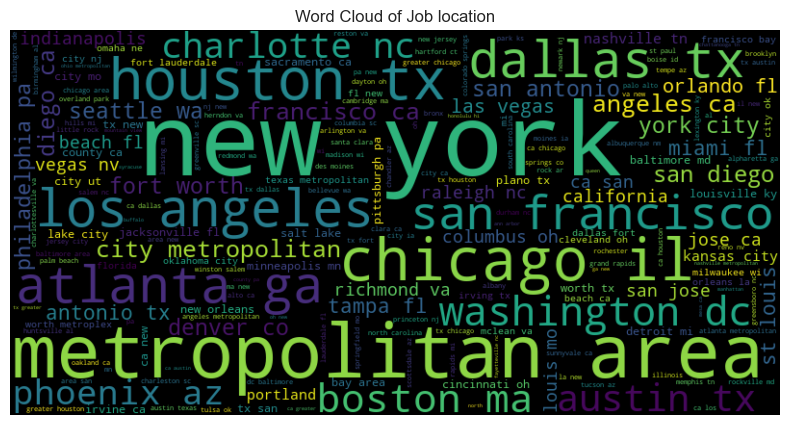

In [50]:
wordcloud = WordCloud(stopwords=stopwords,width=800, height=400, background_color='black').generate(' '.join(df["location"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job location')
plt.show()

##### 12.Word Cloud of Skills Description

In [51]:
df.columns


Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency',
       'description_length', 'calculated_expiry_date', 'is_expired'],
      dtype='object')

### Correlation Analysis

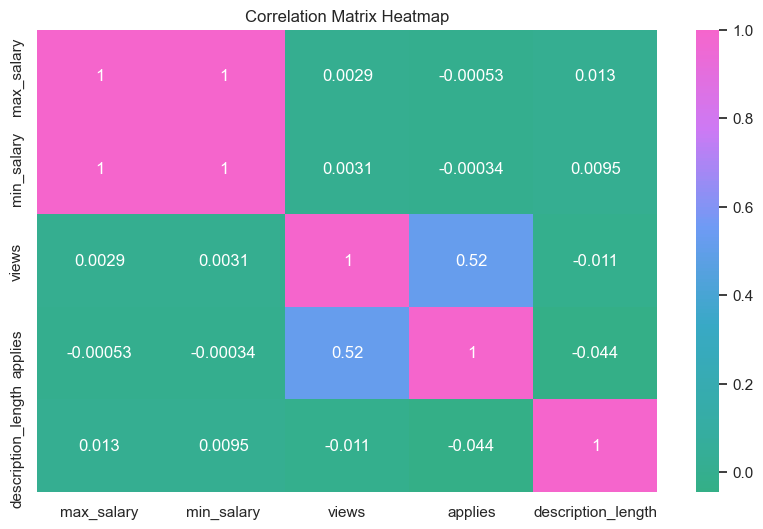

In [52]:
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', custom_palette)

# Compute the correlation matrix
correlation_matrix = df[['max_salary', 'min_salary', 'views', 'applies', 'description_length']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [53]:
# Pearson Correlation
correlation_matrix = df[['max_salary', 'min_salary', 'views', 'applies']].corr(method='pearson')
print(correlation_matrix)

# Spearman Rank Correlation
spearman_corr = df[['max_salary', 'min_salary', 'views', 'applies']].corr(method='spearman')
spearman_corr


            max_salary  min_salary  views  applies
max_salary           1           1      0       -0
min_salary           1           1      0       -0
views                0           0      1        1
applies             -0          -0      1        1


,max_salary,min_salary,views,applies
max_salary,1,1,0,0
min_salary,1,1,0,0
views,0,0,1,0
applies,0,0,0,1


In [54]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency',
       'description_length', 'calculated_expiry_date', 'is_expired'],
      dtype='object')

## Feature Engineering

In [55]:
# Engineering the new feature 'average_salary'
df['average_salary'] = (df['max_salary'] + df['min_salary']) / 2

# Dropping the 'min_salary' and 'max_salary' columns
df.drop(columns=['min_salary', 'max_salary'], inplace=True)


In [56]:
df.shape


(123849, 16)

In [57]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'pay_period',
       'location', 'views', 'applies', 'formatted_experience_level',
       'listed_time', 'work_type', 'currency', 'description_length',
       'calculated_expiry_date', 'is_expired', 'average_salary'],
      dtype='object')

In [58]:
# List of columns to drop
columns_to_drop = [              
    'calculated_expiry_date',
    'is_expired',
    'pay_period',#
    
    ]
# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
df

,job_id,company_name,title,description,location,views,applies,formatted_experience_level,listed_time,work_type,currency,description_length,average_salary
0,921716,corcoran sawyer smith,marketing coordinator,job descriptiona leading real estate firm in n...,"princeton, nj",20,2,not specified,2024-07-17 05:04:24.663988736,full_time,KSH,2525,18
1,1829192,unknown,mental health therapist/counselor,"at aspen therapy and wellness , we are committ...","fort collins, co",1,3,not specified,2024-07-15 17:17:49.975949568,full_time,KSH,3560,40
2,10998357,the national exemplar,assitant restaurant manager,the national exemplar is accepting application...,"cincinnati, oh",8,3,not specified,2024-07-14 03:42:25.283783168,full_time,KSH,460,"55,000"
3,23221523,"abrams fensterman, llp",senior elder law / trusts and estates associat...,senior associate attorney - elder law / trusts...,"new hyde park, ny",16,3,not specified,2024-07-28 20:20:28.760753920,full_time,KSH,1594,"157,500"
4,35982263,unknown,service technician,looking for hvac service tech with experience ...,"burlington, ia",3,3,not specified,2024-07-13 11:22:02.779477248,full_time,KSH,232,"70,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,lozano smith,title ix/investigations attorney,our walnut creek office is currently seeking a...,"walnut creek, ca",1,3,mid-senior level,2024-07-28 22:45:32.448616960,full_time,KSH,2002,"157,500"
123845,3906267126,pinterest,"staff software engineer, ml serving platform",about pinterest: millions of people across the...,united states,3,3,mid-senior level,2024-08-16 13:00:26.905251584,full_time,KSH,5374,"70,000"
123846,3906267131,eps learning,"account executive, oregon/washington",company overview eps learning is a leading k–1...,"spokane, wa",3,3,mid-senior level,2024-08-27 15:34:25.459401728,full_time,KSH,6415,"70,000"
123847,3906267195,trelleborg applied technologies,business development manager,the business development manager is a 'hunter'...,"texas, united states",4,3,not specified,2024-07-13 23:52:31.217126912,full_time,KSH,3493,"70,000"


In [59]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'location', 'views',
       'applies', 'formatted_experience_level', 'listed_time', 'work_type',
       'currency', 'description_length', 'average_salary'],
      dtype='object')

In [60]:
df.dtypes

job_id                                object
company_name                          object
title                                 object
description                           object
location                              object
views                                float64
applies                              float64
formatted_experience_level            object
listed_time                   datetime64[ns]
work_type                             object
currency                              object
description_length                     int64
average_salary                       float64
dtype: object

In [61]:
# Convert 'listed_time' to a numerical feature (e.g., days since listing)
df['listed_time'] = pd.to_datetime(df['listed_time'])
df['days_since_listed'] = (pd.Timestamp.now() - df['listed_time']).dt.days

# Drop the original 'listed_time' column
df = df.drop(columns=['listed_time'])

# Convert object columns to categorical
categorical_columns = ['job_id', 'company_name', 'title', 'description', 'location', 'formatted_experience_level', 'work_type', 'currency']
df[categorical_columns] = df[categorical_columns].astype('category')

# Convert float64 columns to int
# Handle possible missing values before conversion by filling or dropping as appropriate
df['views'] = df['views'].fillna(0).astype(int)
df['applies'] = df['applies'].fillna(0).astype(int)
df['average_salary'] = df['average_salary'].fillna(0).astype(int)

# Check data types after conversion
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
job_id                        category
company_name                  category
title                         category
description                   category
location                      category
views                            int32
applies                          int32
formatted_experience_level    category
work_type                     category
currency                      category
description_length               int64
average_salary                   int32
days_since_listed                int64
dtype: object


### Data Preprocessing

##### 1.Encode categorical columns

In [62]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = ['formatted_experience_level', 'work_type', 'currency']

# Initialize LabelEncoders for each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

##### 2.Standardise Numerical Columns

In [63]:
from sklearn.preprocessing import StandardScaler

# Identify categorical column
numerical_features = ['views','applies','description_length','average_salary']

# Innitialise standard scaller
scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

##### 3.Tokenise Text Columns using NLP

In [64]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):  # Ensure the text is a string
        tokens = word_tokenize(text.lower())  # Tokenize and lower case
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
        return ' '.join(tokens)
    return text  # Return text as is if it's not a string

# Specify the columns to preprocess
text_columns = ['company_name', 'title', 'location', 'description']

# Apply preprocessing to the specified columns
for column in text_columns:
        df[f'processed_{column}'] = df[column].apply(preprocess_text)

# Display the preprocessed DataFrame
df


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Caro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Caro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Caro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,job_id,company_name,title,description,location,views,applies,formatted_experience_level,work_type,currency,description_length,average_salary,days_since_listed,processed_company_name,processed_title,processed_location,processed_description
0,921716,corcoran sawyer smith,marketing coordinator,job descriptiona leading real estate firm in n...,"princeton, nj",0,-0,6,1,5,-1,-0,20,corcoran sawyer smith,marketing coordinator,princeton nj,job descriptiona leading real estate firm new ...
1,1829192,unknown,mental health therapist/counselor,"at aspen therapy and wellness , we are committ...","fort collins, co",-0,-0,6,1,5,-0,-0,21,unknown,mental health,fort collins co,aspen therapy wellness committed serving clien...
2,10998357,the national exemplar,assitant restaurant manager,the national exemplar is accepting application...,"cincinnati, oh",-0,-0,6,1,5,-2,-0,23,national exemplar,assitant restaurant manager,cincinnati oh,national exemplar accepting application assist...
3,23221523,"abrams fensterman, llp",senior elder law / trusts and estates associat...,senior associate attorney - elder law / trusts...,"new hyde park, ny",0,-0,6,1,5,-1,0,8,abrams fensterman llp,senior elder law trust estate associate attorney,new hyde park ny,senior associate attorney elder law trust esta...
4,35982263,unknown,service technician,looking for hvac service tech with experience ...,"burlington, ia",-0,-0,6,1,5,-2,-0,23,unknown,service technician,burlington ia,looking hvac service tech experience commerica...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,lozano smith,title ix/investigations attorney,our walnut creek office is currently seeking a...,"walnut creek, ca",-0,-0,5,1,5,-1,0,8,lozano smith,title attorney,walnut creek ca,walnut creek office currently seeking attorney...
123845,3906267126,pinterest,"staff software engineer, ml serving platform",about pinterest: millions of people across the...,united states,-0,-0,5,1,5,1,-0,-11,pinterest,staff software engineer ml serving platform,united state,pinterest million people across world come pin...
123846,3906267131,eps learning,"account executive, oregon/washington",company overview eps learning is a leading k–1...,"spokane, wa",-0,-0,5,1,5,1,-0,-22,eps learning,account executive,spokane wa,company overview eps learning leading suppleme...
123847,3906267195,trelleborg applied technologies,business development manager,the business development manager is a 'hunter'...,"texas, united states",-0,-0,6,1,5,-0,-0,23,trelleborg applied technology,business development manager,texas united state,business development manager carry task suppor...


 ### Principal Component Analysis(PCA)

In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Print column names for debugging
print("DataFrame columns:", df.columns.tolist())

# Define categorical and numerical columns (ensure these exist in df)
categorical_columns = ['formatted_experience_level', 'pay_period', 'work_type']
numerical_columns = ['average_salary','views','applies','description_length',]

# Verify that all columns exist in df
numerical_columns = [col for col in numerical_columns if col in df.columns]
categorical_columns = [col for col in categorical_columns if col in df.columns]

print("Verified numerical columns:", numerical_columns)
print("Verified categorical columns:", categorical_columns)

# Define transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat_nom', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
         [col for col in categorical_columns if col in ['company_name', 'location', 'currency', 'work_type']]),  # Nominal categorical features
        ('cat_ord', OrdinalEncoder(), 
         [col for col in categorical_columns if col in ['formatted_experience_level', 'pay_period']])  # Ordinal categorical features
    ])


DataFrame columns: ['job_id', 'company_name', 'title', 'description', 'location', 'views', 'applies', 'formatted_experience_level', 'work_type', 'currency', 'description_length', 'average_salary', 'days_since_listed', 'processed_company_name', 'processed_title', 'processed_location', 'processed_description']
Verified numerical columns: ['average_salary', 'views', 'applies', 'description_length']
Verified categorical columns: ['formatted_experience_level', 'work_type']


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# Create a pipeline with preprocessing and PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95))  # Retain 95% of variance
])

# Fit and transform the data
pca_transformed_data = pipeline.fit_transform(df)

# Get the number of components
num_components = pipeline.named_steps['pca'].n_components_

# Create DataFrame from the transformed data
df_pca = pd.DataFrame(pca_transformed_data, columns=[f'PC{i+1}' for i in range(num_components)])

# Display the updated DataFrame
print("PCA-transformed DataFrame:")
print(df_pca.head())

PCA-transformed DataFrame:
   PC1  PC2  PC3  PC4  PC5
0    2   -0   -1    0   -0
1    2   -0   -0   -0    0
2    2   -0   -1    1   -0
3    2   -0   -1    1   -0
4    2   -0   -1    1   -0


In [67]:
# Extract the PCA component from the pipeline
df_pca= pipeline.named_steps['pca']

# Explained variance by each principal component
explained_variance = df_pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Print explained variance
print("Explained variance by each component:\n", explained_variance)
print("Cumulative explained variance:\n", cumulative_explained_variance)

Explained variance by each component:
 [0.47832477 0.18272502 0.12231278 0.11891283 0.0577925 ]
Cumulative explained variance:
 [0.47832477 0.66104979 0.78336258 0.90227541 0.96006791]


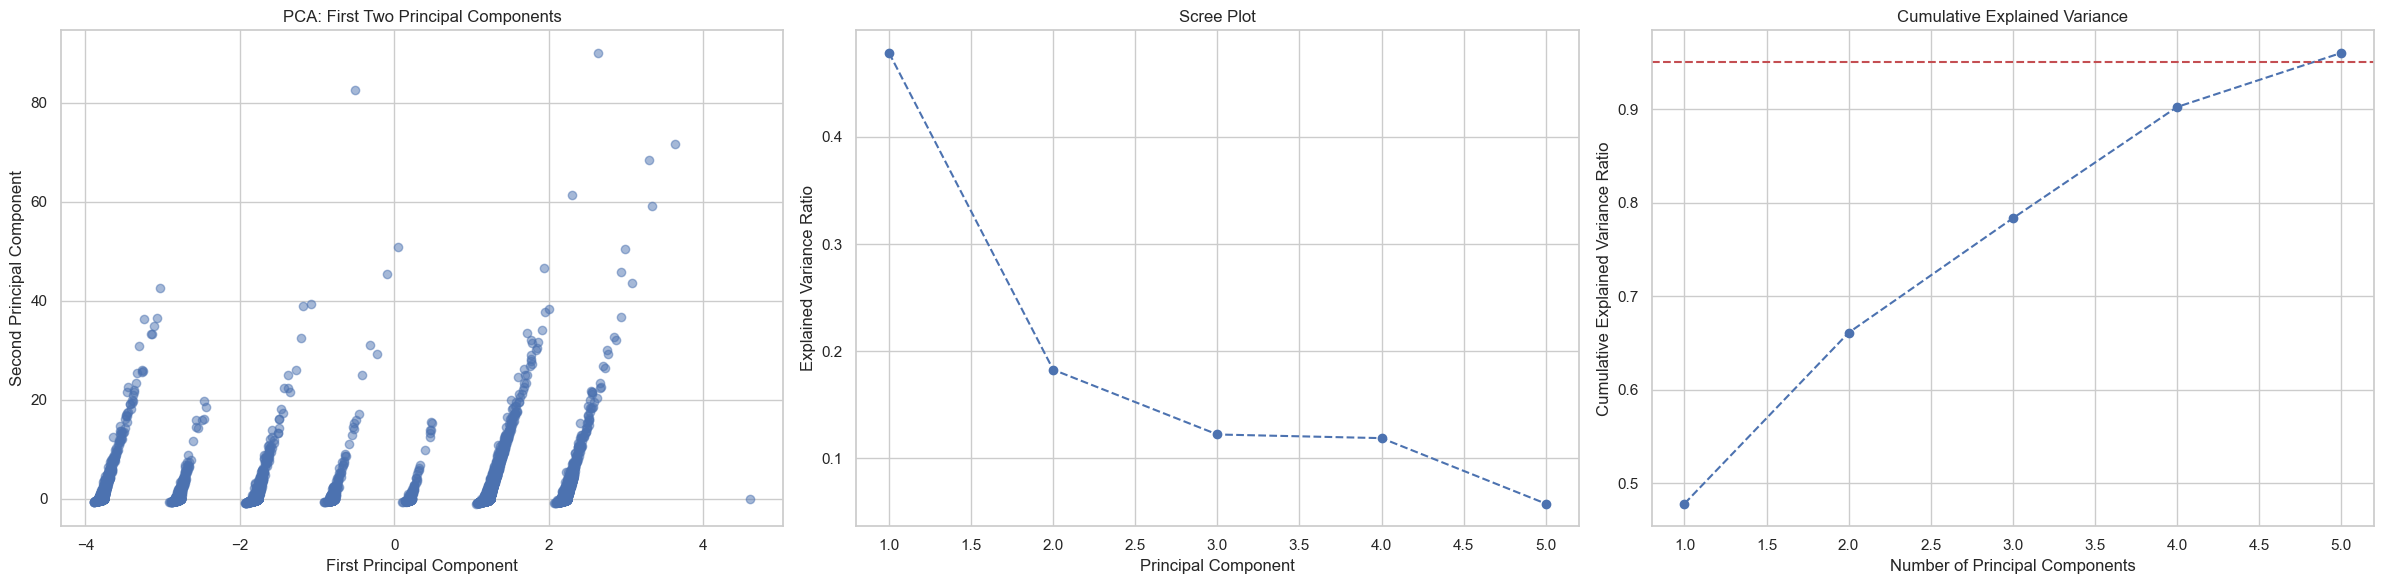

In [68]:
# Create a figure with three subplots arranged in a row
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Scatter plot of the first two principal components (moved to the first position)
sc = axs[0].scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], alpha=0.5)
axs[0].set_title('PCA: First Two Principal Components')
axs[0].set_xlabel('First Principal Component')
axs[0].set_ylabel('Second Principal Component')
axs[0].grid(True)

# Scree plot (moved to the second position)
axs[1].plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
axs[1].set_title('Scree Plot')
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('Explained Variance Ratio')
axs[1].grid(True)

# Cumulative explained variance plot (moved to the third position)
axs[2].plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
axs[2].set_title('Cumulative Explained Variance')
axs[2].set_xlabel('Number of Principal Components')
axs[2].set_ylabel('Cumulative Explained Variance Ratio')
axs[2].grid(True)
axs[2].axhline(y=0.95, color='r', linestyle='--')  # Line at 95% variance

# Show the plots
plt.tight_layout()
plt.show()

In [69]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'location', 'views',
       'applies', 'formatted_experience_level', 'work_type', 'currency',
       'description_length', 'average_salary', 'days_since_listed',
       'processed_company_name', 'processed_title', 'processed_location',
       'processed_description'],
      dtype='object')

### Feature Selection

##### 1.Predctor Dataframe

In [70]:
# Create a copy of the DataFrame for prediction
predictor_df = df[['views', 'description_length', 'average_salary', 'formatted_experience_level',
                   'days_since_listed', 'work_type']].copy()

# Create the target variable 'high_applications'
median_applies = df['applies'].median()  # Calculate the median of 'applies'
predictor_df['high_applications'] = (df['applies'] > median_applies).astype(int)  # Assign to the copy

# Display the predictor DataFrame
predictor_df.head()

,views,description_length,average_salary,formatted_experience_level,days_since_listed,work_type,high_applications
0,0,-1,-0,6,20,1,0
1,-0,-0,-0,6,21,1,0
2,-0,-2,-0,6,23,1,0
3,0,-1,0,6,8,1,0
4,-0,-2,-0,6,23,1,0


##### 2.Recommender Dataframe

In [71]:
# Features 
recommender_df = df[['job_id', 'processed_title', 'processed_description', 'processed_location', 'views','applies',
                     'processed_company_name','work_type', 'average_salary']]

# Display the recommender DataFrame
recommender_df.head()

,job_id,processed_title,processed_description,processed_location,views,applies,processed_company_name,work_type,average_salary
0,921716,marketing coordinator,job descriptiona leading real estate firm new ...,princeton nj,0,-0,corcoran sawyer smith,1,-0
1,1829192,mental health,aspen therapy wellness committed serving clien...,fort collins co,-0,-0,unknown,1,-0
2,10998357,assitant restaurant manager,national exemplar accepting application assist...,cincinnati oh,-0,-0,national exemplar,1,-0
3,23221523,senior elder law trust estate associate attorney,senior associate attorney elder law trust esta...,new hyde park ny,0,-0,abrams fensterman llp,1,0
4,35982263,service technician,looking hvac service tech experience commerica...,burlington ia,-0,-0,unknown,1,-0


### 4.MODELLING

#### 1.Predictor Model


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report


#### Class Imbalance

In [73]:
from sklearn.utils import resample

# Check distribution of the target variable
print(predictor_df['high_applications'].value_counts())

# Resample if there is a class imbalance
df_majority = predictor_df[predictor_df.high_applications == 0]
df_minority = predictor_df[predictor_df.high_applications == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_majority), # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
predictor_df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Split the data again
X_balanced = predictor_df_balanced[['views', 'description_length', 'average_salary', 'formatted_experience_level', 'days_since_listed', 'work_type']]
y_balanced = predictor_df_balanced['high_applications']

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_balanced = scaler.fit_transform(X_balanced)


high_applications
0    113763
1     10086
Name: count, dtype: int64


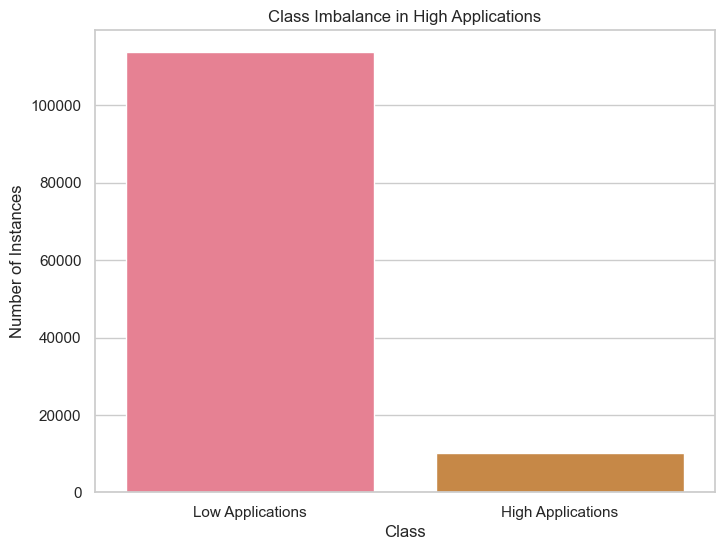

In [74]:
# Check distribution of the target variable
class_counts = predictor_df['high_applications'].value_counts()

# Create a bar plot to visualize class imbalance
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=custom_palette)
plt.title('Class Imbalance in High Applications')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Low Applications', 'High Applications'])
plt.show()

#### Handle Class Imbalance

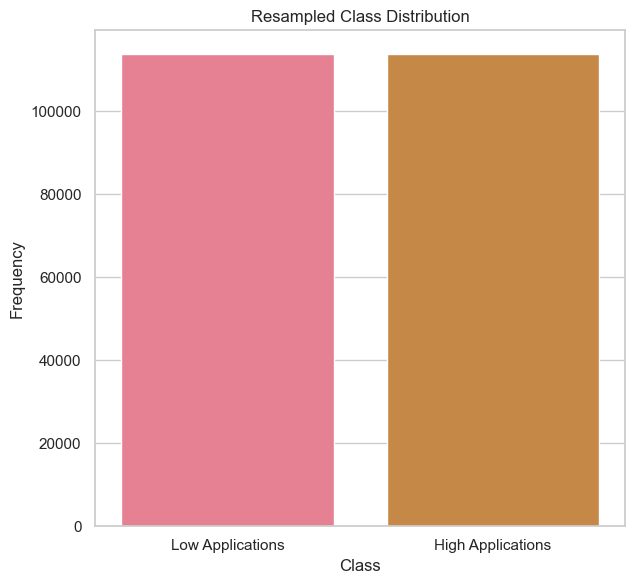

In [75]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_balanced, y_balanced)

# Calculate resampled class distribution
resampled_class_distribution = pd.Series(y_resampled).value_counts()

# Plot resampled class distribution
plt.figure(figsize=(12, 6))

# Plot the resampled class distribution
plt.subplot(1, 2, 2)  
sns.barplot(x=resampled_class_distribution.index, y=resampled_class_distribution.values,palette=custom_palette)
plt.title('Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Low Applications', 'High Applications'])

plt.tight_layout()
plt.show()


#### Split the data 

In [76]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = predictor_df[['views', 'description_length', 'average_salary', 'formatted_experience_level',
                  'days_since_listed', 'work_type']]
y = predictor_df['high_applications']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictor_df, y, test_size=0.3, random_state=42)

# Verify the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (86694, 7)
X_test shape: (37155, 7)
y_train shape: (86694,)
y_test shape: (37155,)


In [77]:
# Standardize the features (optional, but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


###  Baseline Model: LogisticRegression

Model: Logistic Regression
Cross-Validation Accuracy: 0.9414308774316721 (+/- 0.007049881631801687)
Test Accuracy: 0.9425252498615543
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    113763
           1       0.96      0.93      0.94    113763

    accuracy                           0.94    227526
   macro avg       0.94      0.94      0.94    227526
weighted avg       0.94      0.94      0.94    227526

ROC-AUC Score: 0.987898691822847


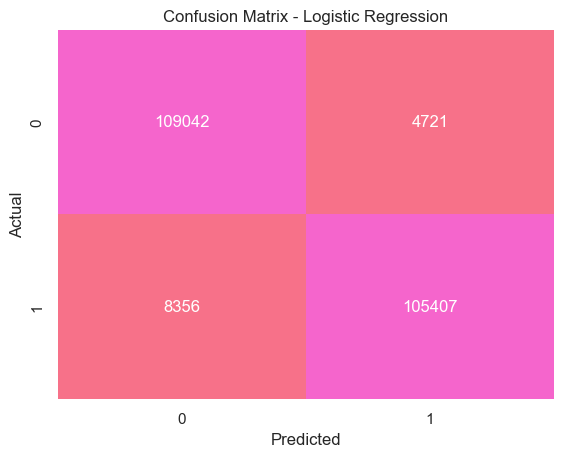

In [78]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_model = LogisticRegression(random_state=42)
from sklearn.model_selection import cross_val_score

def perform_cross_validation(model, X, y, cv=5):
    
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})")
    return cv_scores

# Perform cross-validation
print("Model: Logistic Regression")
cv_results_logistic = perform_cross_validation(logistic_model, X_balanced, y_balanced)

# Train the model on the entire balanced dataset
logistic_model.fit(X_balanced, y_balanced)

# Predict on the entire balanced dataset
y_pred_logistic = logistic_model.predict(X_balanced)

# Evaluate the model
accuracy_logistic = accuracy_score(y_balanced, y_pred_logistic)
classification_rep_logistic = classification_report(y_balanced, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_balanced, logistic_model.predict_proba(X_balanced)[:, 1])
conf_matrix_logistic = confusion_matrix(y_balanced, y_pred_logistic)

print(f"Test Accuracy: {accuracy_logistic}")
print(f"Classification Report:\n{classification_rep_logistic}")
print(f"ROC-AUC Score: {roc_auc_logistic}")

# Plot confusion matrix
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap=sns.color_palette(custom_palette), cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


#### Hyperparameter tunning  for LogisticRegression

In [79]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

Best Parameters: {'C': 100, 'solver': 'liblinear'}
Best Accuracy Score: 0.9419319202105914


### RandomForestClassifier

Model: Random Forest
Cross-Validation Accuracy: 0.9859181022641099 (+/- 0.006985835321710261)
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113763
           1       1.00      1.00      1.00    113763

    accuracy                           1.00    227526
   macro avg       1.00      1.00      1.00    227526
weighted avg       1.00      1.00      1.00    227526

ROC-AUC Score: 0.9999999999999999


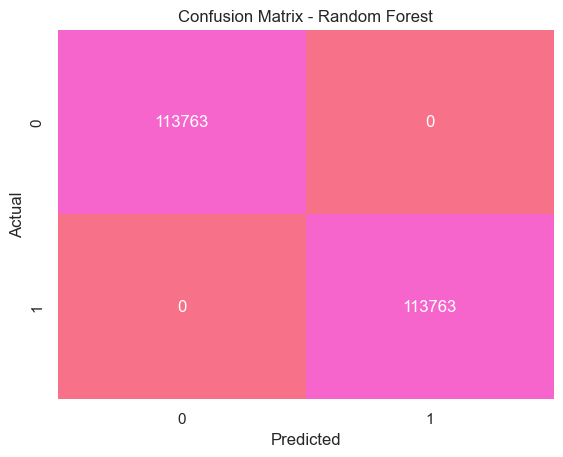

In [80]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
forest_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
print("Model: Random Forest")
cv_results_forest = perform_cross_validation(forest_model, X_balanced, y_balanced)

# Train the model on the entire balanced dataset
forest_model.fit(X_balanced, y_balanced)

# Predict on the entire balanced dataset
y_pred_forest = forest_model.predict(X_balanced)

# Evaluate the model
accuracy_forest = accuracy_score(y_balanced, y_pred_forest)
classification_rep_forest = classification_report(y_balanced, y_pred_forest)
roc_auc_forest = roc_auc_score(y_balanced, forest_model.predict_proba(X_balanced)[:, 1])
conf_matrix_forest = confusion_matrix(y_balanced, y_pred_forest)

print(f"Test Accuracy: {accuracy_forest}")
print(f"Classification Report:\n{classification_rep_forest}")
print(f"ROC-AUC Score: {roc_auc_forest}")

# Plot confusion matrix
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap=sns.color_palette(custom_palette), cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


### GradientBoostingClassifier

Model: Gradient Boosting
Cross-Validation Accuracy: 0.9523087722208624 (+/- 0.014922388876320473)
Test Accuracy: 0.9533196206147869
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    113763
           1       0.94      0.97      0.95    113763

    accuracy                           0.95    227526
   macro avg       0.95      0.95      0.95    227526
weighted avg       0.95      0.95      0.95    227526

ROC-AUC Score: 0.9889227187774444


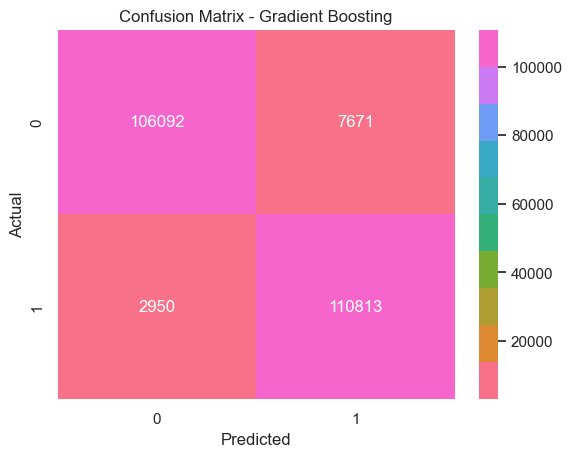

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform cross-validation
print("Model: Gradient Boosting")
cv_results_gb = perform_cross_validation(gb_model, X_balanced, y_balanced)

# Train the model on the entire balanced dataset
gb_model.fit(X_balanced, y_balanced)

# Predict on the entire balanced dataset
y_pred_gb = gb_model.predict(X_balanced)

# Evaluate the model
accuracy_gb = accuracy_score(y_balanced, y_pred_gb)
classification_rep_gb = classification_report(y_balanced, y_pred_gb)
roc_auc_gb = roc_auc_score(y_balanced, gb_model.predict_proba(X_balanced)[:, 1])
conf_matrix_gb = confusion_matrix(y_balanced, y_pred_gb)

print(f"Test Accuracy: {accuracy_gb}")
print(f"Classification Report:\n{classification_rep_gb}")
print(f"ROC-AUC Score: {roc_auc_gb}")

# Plot confusion matrix
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap=sns.color_palette(custom_palette))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


### KNeighborsClassifier

Model: K-Nearest Neighbors
Cross-Validation Accuracy: 0.9727855347210752 (+/- 0.008027957734039066)
Test Accuracy: 0.9840501744855533
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    113763
           1       0.97      1.00      0.98    113763

    accuracy                           0.98    227526
   macro avg       0.98      0.98      0.98    227526
weighted avg       0.98      0.98      0.98    227526

ROC-AUC Score: 0.9999814648333979


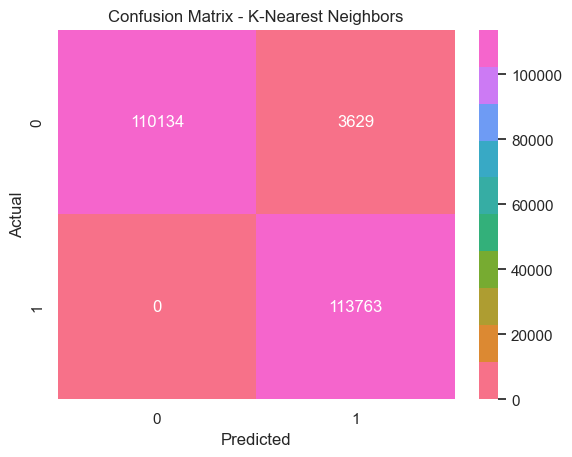

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform 5-fold cross-validation
def perform_cross_validation(model, X, y):
    cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_results.mean()} (+/- {cv_results.std()})")
    return cv_results

# Perform cross-validation
print("Model: K-Nearest Neighbors")
cv_results_knn = perform_cross_validation(knn_model, X_balanced, y_balanced)

# Train the model on the entire balanced dataset
knn_model.fit(X_balanced, y_balanced)

# Predict on the entire balanced dataset
y_pred_knn = knn_model.predict(X_balanced)

# Evaluate the model
accuracy_knn = accuracy_score(y_balanced, y_pred_knn)
classification_rep_knn = classification_report(y_balanced, y_pred_knn)
roc_auc_knn = roc_auc_score(y_balanced, knn_model.predict_proba(X_balanced)[:, 1])
conf_matrix_knn = confusion_matrix(y_balanced, y_pred_knn)

print(f"Test Accuracy: {accuracy_knn}")
print(f"Classification Report:\n{classification_rep_knn}")
print(f"ROC-AUC Score: {roc_auc_knn}")

# Plot confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap=sns.color_palette(custom_palette))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()


## Project Stretch

#### 2.Recommender Model

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


#### Content-Based Recommendation

In [89]:
# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_description = vectorizer.fit_transform(recommender_df['processed_description'])

def get_recommendations(user_description, N=5):
    # Transform the user profile using the same vectorizer
    user_profile = vectorizer.transform([user_description])

    # Compute cosine similarity scores between user profile and job postings
    similarity_scores = cosine_similarity(X_description, user_profile)

    # Get top N recommendations
    top_n_indices = similarity_scores.flatten().argsort()[-N:][::-1]  # Top N indices
    top_recommendations = recommender_df.iloc[top_n_indices]
    
    return top_recommendations

# Input job description from the user
user_description = input("Enter your job description: ")

# Display the top N recommendations
top_recommendations = get_recommendations(user_description)
print("\nTop Recommendations:")
top_recommendations

Enter your job description: customer care is my speciallty

Top Recommendations:


,job_id,processed_title,processed_description,processed_location,views,applies,processed_company_name,work_type,average_salary
40765,3898176178,care management facility director,rudish health currently seeking qualified cand...,orlando fl,1,-0,rudish health,1,-0
52184,3901396306,tailored care manager,position responsible providing integrated care...,asheville nc,-0,-0,insight human service,1,-0
34307,3895281307,head customer care latam,client global shipping company seeking hire he...,miami fl,-0,-0,petersan group petersan legal staffing,1,0
98502,3904982842,rn care coordinator day,job summary inpatient care manager registered ...,clackamas,-0,-0,kaiser permanente northwest,4,-0
8061,3885860879,transition care rn,u one medical primary care solution challengin...,atlanta ga,-0,-0,one medical,1,-0


#### KNN recommendation system 

In [91]:
from sklearn.neighbors import NearestNeighbors

# Prepare feature matrix
X_features = recommender_df[['views', 'applies', 'average_salary']].values

# Apply KNN for job recommendations
knn = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X_features)
distances, indices = knn.kneighbors(X_features)

# Calculate average distance of nearest neighbors
average_distance = np.mean(distances)

# Print average distance
print(f"Average Distance to Nearest Neighbors: {average_distance:.2f}")

# Display KNN recommendations for a specific job
job_id = 0
recommendations = indices[job_id]
top_recommendations = recommender_df.iloc[recommendations[0]]

print("\nKNN Recommendations:")
print(top_recommendations)

Average Distance to Nearest Neighbors: 0.00

KNN Recommendations:
job_id                                                           3904373202
processed_title                                        specimen accessioner
processed_description     organized accountable always gone extra mile m...
processed_location                                             riverside ca
views                                                                     0
applies                                                                  -0
processed_company_name                                              labcorp
work_type                                                                 1
average_salary                                                           -0
Name: 86064, dtype: object


##### Recommend Most Viewed Jobs

In [93]:
# Prompt user for the number of top jobs to recommend
try:
    top_n = int(input("Enter the number of top jobs to recommend: "))
    if top_n <= 0:
        raise ValueError("The number of top jobs must be a positive integer.")
except ValueError as e:
    print(f"Invalid input: {e}")
    top_n = 10 # Default value

# Prompt user for job title
title_input = input("Enter the job title to filter by: ").strip()

# Filter DataFrame by job title and get the top N jobs based on views
filtered_df = recommender_df[recommender_df['processed_title'].str.contains(title_input, case=False, na=False)]

if not filtered_df.empty:
    recommendations = filtered_df.sort_values(by='views', ascending=False).head(top_n)
    print("Top recommended jobs based on your input:")
    print(recommendations)
else:
    print(f"No jobs found with the title containing '{title_input}'")

Enter the number of top jobs to recommend: 5
Enter the job title to filter by: data scientist
Top recommended jobs based on your input:
           job_id                    processed_title  \
55394  3901802024                  data scientist ii   
53326  3901641401  data scientist business operation   
72933  3902914840                     data scientist   
41468  3899524261                     data scientist   
67390  3902754520                     data scientist   

                                   processed_description  \
55394  job description year professional experience d...   
53326  looking building extremely operation finance d...   
72933  mission tetricus forefront merging advanced te...   
41468  working clean energy space energy trading plat...   
67390  job description washington post personalizatio...   

                   processed_location  views  applies  processed_company_name  \
55394                    united state      7       16                 fanatic   
5332

##### Recommend Based on Job Description

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Initialize the TF-IDF Vectorizer and transform the job descriptions
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['description'])

def preprocess_text(text):
    # Example text preprocessing
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

def recommend_jobs(input_description, top_n=10):
    input_description_processed = preprocess_text(input_description)
    input_vector = vectorizer.transform([input_description_processed])
    similarities = cosine_similarity(input_vector, tfidf_matrix).flatten()
    indices = similarities.argsort()[-top_n:][::-1]
    return df.iloc[indices]

def main():
    while True:
        print("\nJob Recommendation System")
        print("1. Recommend Jobs")
        print("2. Exit")
        choice = input("Enter your choice (1/2): ")
        
        if choice == '1':
            input_desc = input("Enter job description to find recommendations: ")
            recommended_jobs = recommend_jobs(input_desc)
            print("\nRecommended Jobs:")
            print(recommended_jobs[['title', 'company_name', 'location']])
        
        elif choice == '2':
            print("Exiting...")
            break
        
        else:
            print("Invalid choice. Please enter 1 or 2.")

if __name__ == "__main__":
    main()



Job Recommendation System
1. Recommend Jobs
2. Exit
Enter your choice (1/2): 1
Enter job description to find recommendations: engineer

Recommended Jobs:
                                      title           company_name  \
10405                   mechanical engineer                unknown   
80263                 mechatronics engineer           verto people   
96207                   operations engineer              cps, inc.   
96064                   operations engineer              cps, inc.   
55733                       system engineer  agile resources, inc.   
55573       senior process control engineer       westrock company   
55980  instrumentation and control engineer           randstad usa   
12522                      network engineer      horizontal talent   
9473              site reliability engineer            robert half   
55417                   mechanical engineer      jmj phillip group   

                              location  
10405  new york city metropolitan

##  MODEL EVALUATION

## CONCLUSION

## RECOMMENDATION

###  Feature Importance